<a href="https://colab.research.google.com/github/faisal-ba-systems/ML-course-documents/blob/main/EDA_Project_Cost_Estimation_Business_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Analysis Dataset

### Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns

### Import Dataset

In [ ]:
!pip install -q gdown

# Data 12 month: 24-Aug-2024 to 24-Aug-2025, collection date: 24/08/2025
# https://docs.google.com/spreadsheets/d/13SJ9s2skyqO1vGimtU9RVC7v7T9jwX3B1TpvsA1pHO0/edit?usp=sharing
# ! gdown 13SJ9s2skyqO1vGimtU9RVC7v7T9jwX3B1TpvsA1pHO0

# Data 18 month: 24-Feb-2024 to 24-Aug-2025, collection date: 24/08/2025
# https://docs.google.com/spreadsheets/d/1f7_sphNw3aAvWJm6MyUmuUwBphN2PwZI32CQk1jj9JA/edit?usp=sharing
! gdown 1f7_sphNw3aAvWJm6MyUmuUwBphN2PwZI32CQk1jj9JA

Downloading...
From (original): https://drive.google.com/uc?id=1f7_sphNw3aAvWJm6MyUmuUwBphN2PwZI32CQk1jj9JA
From (redirected): https://docs.google.com/spreadsheets/d/1f7_sphNw3aAvWJm6MyUmuUwBphN2PwZI32CQk1jj9JA/export?format=xlsx
To: /content/Project Milestone wise log for 18 months 24082025.xlsx
10.1MB [00:00, 40.2MB/s]


In [ ]:
# excel_path ='/content/Project Milestone wise log for 12 months 24082025.xlsx'
excel_path ='/content/Project Milestone wise log for 18 months 24082025.xlsx'
sheet_milestone_resource = 'Milestone Details'
sheet_projects = 'Projects'
sheet_log_hour_against_issue = 'Log Details'
df_milestone_resource = pd.read_excel(excel_path, sheet_name=sheet_milestone_resource)
df_projects = pd.read_excel(excel_path, sheet_name=sheet_projects)
df_log_hour_issue = pd.read_excel(excel_path, sheet_name=sheet_log_hour_against_issue)

In [ ]:
print('First work date: (MM/DD/YYYY): ',list(df_log_hour_issue['work_dt'].head(1)))
print('Last work date: (MM/DD/YYYY): ',list(df_log_hour_issue['work_dt'].tail(1)))


First work date: (MM/DD/YYYY):  ['2/24/2024']
Last work date: (MM/DD/YYYY):  ['8/24/2025']


In [ ]:
def report_data_types_uniques_check(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())

    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [ ]:
# report_data_types_uniques_check(df_projects)
# report_data_types_uniques_check(df_milestone_resource)
# report_data_types_uniques_check(df_log_hour_issue)

### Analysis Dataset

In [ ]:
# list(df_projects['type'].unique())
# list(df_projects['status'].unique())

In [ ]:
import re
# --- Bangladeshi/Indian number formatting helpers ---
def format_bd_comma(n: float | int) -> str:
    """
    Format number with Indian/Bangladeshi comma style:
    123 -> 123
    1234 -> 1,234
    123456 -> 1,23,456
    Keeps decimals if present.
    """
    if n is None:
        return "0"
    neg = n < 0
    n = abs(n)

    s = f"{n:.0f}" if float(n).is_integer() else f"{n:.2f}"
    if "." in s:
        whole, frac = s.split(".")
        frac = "." + frac.rstrip("0").rstrip(".")
    else:
        whole, frac = s, ""

    if len(whole) <= 3:
        out = whole
    else:
        last3 = whole[-3:]
        rest = whole[:-3]
        rest = re.sub(r"(\d)(?=(\d{2})+$)", r"\1,", rest)  # group by 2s
        out = rest + "," + last3

    return ("-" if neg else "") + out + frac

def format_bd_unit(n: float | int, bn: bool = False) -> str:
    """
    Short unit string in হাজার/লাখ/কোটি (or English thousand/lakh/crore).
    """
    if n is None:
        return "0"
    neg = n < 0
    n = abs(float(n))

    # thresholds
    CRORE = 1e7     # 1,00,00,000
    LAKH  = 1e5     # 1,00,000
    THOU  = 1e3

    if n >= CRORE:
        val = n / CRORE
        unit = "কোটি" if bn else "crore"
    elif n >= LAKH:
        val = n / LAKH
        unit = "লাখ" if bn else "lakh"
    elif n >= THOU:
        val = n / THOU
        unit = "হাজার" if bn else "thousand"
    else:
        val = n
        unit = ""
    # show up to 2 decimals but trim trailing zeros
    s = f"{val:.2f}".rstrip("0").rstrip(".")
    out = f"{s} {unit}".strip()
    if neg:
        out = "-" + out
    return out

print(format_bd_comma(51454161524))
print(format_bd_comma(514565165))

print(format_bd_unit(51454161524))
print(format_bd_unit(514565165))

51,45,41,61,524
51,45,65,165
5145.42 crore
51.46 crore


In [ ]:
batch_color_discrete_map={
                'complete': 'green',
                'ongoing': 'gold',
                'upcoming': 'lightgreen',
                 }

project_category_color_discrete_map={
                'Commercial': 'green',
                'Non-Commercial': 'blue',
                'Others': 'red'
              }
project_type_color_map = {
    'Service Agreement': '#e74c3c',    # red
    'New Project': '#3498db',          # blue
    'AMC': '#1abc9c',                  # teal
    'Managed Service': '#9b59b6',      # purple
    'RND': '#f1c40f',                  # yellow
    'Internal Project': '#e67e22',     # orange
    'Extend Project': '#2ecc71',       # green
    'Product': '#34495e',              # dark blue/gray
    'Others': '#95a5a6',               # gray
    'New Opportunity': '#d35400',      # dark orange
}

project_status_color_map = {
    'Postponed'      : 'red',
    'Complete'       : 'green',
    'Cancel'         : 'red',
    'Active'         : 'blue',
    'Pause'          : 'orange',
    'In Progress'    : 'purple',
    'Open'           : 'cyan',
    'Implementation' : 'teal',
    'In Warranty'    : 'lime',
    'Inactive'       : 'gray',
    'Maintenance'    : 'brown',
    'Development'    : 'magenta',
    'Unknown'        : 'lightgray'
}


# Section - 1 : EDA Insights on Project Cost Analysis Since Start to Till Now

In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add text annotation with highlighted background
fig.add_annotation(
    x=0.5,  # Positioning the text in the center (0.5 for centered alignment)
    y=0.5,  # Positioning the text in the center
    text="Section - 1 <br> EDA Insights on Project Cost Analysis Since Start to Till Now",  # Your desired text
    font=dict(
        family="Arial",  # Font family
        size=24,  # Font size
        color="white"  # Font color
    ),
    align="center",  # Center-align the text
    showarrow=False,  # No arrow
    bgcolor="green",  # Highlight color for the background
    borderpad=10,  # Padding around the text
)

# Adjust layout to center the plot and text
fig.update_layout(
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False, range=[0, 1]),  # Hide grid, ticks, zero line, and set range
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False, range=[0, 1]),  # Hide grid, ticks, zero line, and set range
    plot_bgcolor="white",  # Set background color of the plot
    # title="Highlighted Text Example",
    showlegend=False,  # Disable legend
    height=500,  # Adjust figure height
    width=1200,  # Adjust figure width
)

# Show the plot
fig.show()


### Clean & Preprocess

In [ ]:
# Safe conversion: invalid dates like '0000-00-00' will become NaT
df_projects['start_dt'] = pd.to_datetime(df_projects['start_dt'], errors='coerce')
df_projects['end_dt'] = pd.to_datetime(df_projects['end_dt'], errors='coerce')

# Calculate duration in days (NaT-safe)
df_projects['duration_days'] = (df_projects['end_dt'] - df_projects['start_dt']).dt.days
df_milestone_resource['duration_days'] = (df_milestone_resource['end_dt'] - df_milestone_resource['start_dt']).dt.days


df_log_hour_issue['start_dt'] = pd.to_datetime(df_log_hour_issue ['start_dt'], errors='coerce')
df_log_hour_issue['end_dt'] = pd.to_datetime(df_log_hour_issue['end_dt'], errors='coerce')

# Calculate duration in days (NaT-safe)
df_log_hour_issue['duration_days'] = (df_log_hour_issue['end_dt'] - df_log_hour_issue['start_dt']).dt.days
df_log_hour_issue['duration_days'] = (df_milestone_resource['end_dt'] - df_milestone_resource['start_dt']).dt.days

# Format as 'YYYY-MM-DD'
df_projects['start_dt'] = df_projects['start_dt'].dt.strftime('%Y-%m-%d')
df_projects['end_dt'] = df_projects['end_dt'].dt.strftime('%Y-%m-%d')

# Fill missing amounts with 0 if necessary
df_projects['amount'] = pd.to_numeric(df_projects['amount'], errors='coerce').fillna(0)

### Project Overview at a Glance

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd

# Step 1: Count number of projects per type
type_counts = df_projects['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Step 2: Sum amount per type
type_amounts = df_projects.groupby('type')['amount'].sum().reset_index()

# Step 3: Merge both into one DataFrame
combined = type_counts.merge(type_amounts, on='type')

# ----- Prepare Table 1: Project Type Summary -----
table1 = combined.copy()
# table1['amount'] = table1['amount'].apply(lambda x: f"৳ {x:,.2f}")
table1['amount'] = table1['amount'].apply(format_bd_comma)

# Add Total row to Table 1
total_row_1 = pd.DataFrame({
    'type': ['Total'],
    'count': [table1['count'].sum()],
    # 'amount': [table1['amount'].sum()],
    'amount': [table1['amount'].str.replace(',', '', regex=True).astype(int).sum()]
})
total_row_1['amount'] = total_row_1['amount'].apply(format_bd_comma)

table1 = pd.concat([table1, total_row_1], ignore_index=True)

# ----- Prepare Table 2: Project Status Distribution -----
df_projects['status'] = df_projects['status'].fillna('Unknown')
status_counts = df_projects.groupby('status').size().reset_index(name='count')
status_counts['pct'] = (status_counts['count'] / status_counts['count'].sum() * 100).round(2)
status_counts['pct'] = status_counts['pct'].apply(lambda x: f"{x:.2f}%")

# Add Total row to Table 2
total_row_2 = pd.DataFrame({
    'status': ['Total'],
    'count': [status_counts['count'].astype(int).sum()],
    'pct': ['100.00%']
})
status_counts = pd.concat([status_counts, total_row_2], ignore_index=True)

# ----- Create Subplot: Two Tables Side-by-Side -----
fig_tables = make_subplots(
    rows=1, cols=2,
    subplot_titles=("<b>Project Count and Budget by Type</b>", "<b>Project Status Distribution</b>"),
    specs=[[{"type": "table"}, {"type": "table"}]]
)

# Add Table 1
fig_tables.add_trace(
    go.Table(
        header=dict(
            values=["<b>Project Type</b>", "<b>Number of Projects</b>", "<b>Total Budget</b>"],
            fill_color='burlywood',
            align='center',
            line_color='black',
            line_width=2,
            font=dict(size=16),
            height=35
        ),
        cells=dict(
            values=[table1['type'], table1['count'], table1['amount']],
            fill_color='white',
            align='center',
            line_color='black',
            line_width=2,
            font=dict(size=14),
            height=30
        )
    ),
    row=1, col=1
)

# Add Table 2
fig_tables.add_trace(
    go.Table(
        header=dict(
            values=["<b>Status</b>", "<b>Number of Projects</b>", "<b>Percentage</b>"],
            fill_color='burlywood',
            align='center',
            line_color='black',
            line_width=2,
            font=dict(size=16),
            height=35
        ),
        cells=dict(
            values=[status_counts['status'], status_counts['count'], status_counts['pct']],
            fill_color='white',
            align='center',
            line_color='black',
            line_width=2,
            font=dict(size=14),
            height=30
        )
    ),
    row=1, col=2
)

# Add caption
fig_tables.update_layout(
    title=dict(
        text=" <b>Project Overview at a Glance</b> <br>From Starting to Till Now",
        x=0.5,
        xanchor='center',
        pad=dict(b=50),
        font=dict(size=25)
    ),
    height=800,
    margin=dict(t=200, b=100),
)

# ---- Show the tables ----
fig_tables.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Define color list for bar chart and pie chart ---
bar_colors = combined['type'].map(project_type_color_map)
pie_colors = combined['type'].map(project_type_color_map)

# Format amounts for hover
formatted_amounts = combined['amount'].apply(format_bd_comma).values.reshape(-1, 1)

# --- Bar chart trace ---
bar_trace = go.Bar(
    x=combined['type'],
    y=combined['count'],
    text=combined['count'],
    textposition='auto',
    marker_color=bar_colors,  # ✅ use color map
    hovertemplate=(
        "Project Type: %{x}<br>" +
        "Number of Projects: %{y}<br>" +
        "Total Budget: %{customdata[0]} ৳<extra></extra>"
    ),
    customdata=formatted_amounts,
    showlegend=False
)

# --- Pie chart trace ---
pie_trace = go.Pie(
    labels=combined['type'],
    values=combined['count'],
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "Number of Projects: %{value}<br>" +
        "Total Budget: %{customdata[0]} ৳<extra></extra>"
    ),
    textinfo='percent',
    customdata=formatted_amounts,
    marker_colors=pie_colors,  # ✅ same color map
    showlegend=True
)

# --- Subplots ---
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{"type": "bar"}, {"type": "domain"}]],
    subplot_titles=("Project Count by Type", "Project Count Share")
)

# Add traces
fig.add_trace(bar_trace, row=1, col=1)
fig.add_trace(pie_trace, row=1, col=2)

# Layout
fig.update_layout(
    title="Chart 1: Project Count and Budget by Type",
    title_x=0.5,
    xaxis=dict(title="Project Type", tickangle=45),
    yaxis=dict(title="Number of Projects"),
    height=500
)

fig.show()

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- Use only real statuses (exclude 'Total') for charts ---
# chart_data = status_counts.copy()
# Fill missing status with 'Unknown'
df_projects['status'] = df_projects['status'].fillna('Unknown')

# Aggregate project counts and amounts by status
chart_data = df_projects.groupby('status').agg(
    count=('status', 'size'),      # Number of projects per status
    amount=('amount', 'sum')       # Total budget per status
).reset_index().sort_values(by='count', ascending=False)

# Apply Bangladeshi comma format to amount
chart_data['amount_formatted'] = chart_data['amount'].apply(format_bd_comma)

# Optional: map colors
colors = [project_status_color_map.get(s, 'black') for s in chart_data['status']]
# Apply Bangladeshi comma format
chart_data['amount_formatted'] = chart_data['amount'].apply(format_bd_comma)

# Bar chart trace
bar_trace = go.Bar(
    x=chart_data['status'],
    y=chart_data['count'],
    text=chart_data['count'],
    textposition='auto',
    marker_color=colors,
    hovertemplate=(
        "Status: %{x}<br>" +
        "Number of Projects: %{y}<br>" +
        "Total Budget: %{customdata[0]} ৳<extra></extra>"
    ),
    customdata=chart_data[['amount_formatted']].values,
    showlegend=False
)

# Pie chart trace
pie_trace = go.Pie(
    labels=chart_data['status'],
    values=chart_data['count'],
    marker_colors=colors,
    hovertemplate=(
        "<b>%{label}</b><br>" +
        "Number of Projects: %{value}<br>" +
        "Total Budget: %{customdata[0]} ৳<extra></extra>"
    ),
    textinfo='percent',
    customdata=chart_data[['amount_formatted']].values,
    showlegend=True
)

# Subplots
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{"type": "bar"}, {"type": "domain"}]],
    subplot_titles=("Project Status Count", "Project Status Share")
)

fig.add_trace(bar_trace, row=1, col=1)
fig.add_trace(pie_trace, row=1, col=2)

fig.update_layout(
    title="Chart 2: Project Status Overview",
    title_x=0.5,
    xaxis=dict(title="Project Status", tickangle=45),
    yaxis=dict(title="Number of Projects"),
    height=500
)

fig.show()


### Top 10 Project Budgets by Status

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ensure numeric and clean data
df_projects['amount'] = pd.to_numeric(df_projects['amount'], errors='coerce')
df_projects = df_projects.dropna(subset=['status', 'caption', 'amount', 'ref_no'])

# Get unique project statuses
project_statuses = df_projects['status'].unique()

# Initialize figure and dropdown buttons
fig = go.Figure()
buttons = []

for i, status in enumerate(project_statuses):
    # Filter and sort top 10 projects by amount
    df_filtered = (
        df_projects[df_projects['status'] == status]
        .sort_values('amount', ascending=False)
        .head(10)
        .sort_values('amount')  # highest bar on top
    )

    # Assign colors based on status
    bar_colors = [project_status_color_map.get(s, 'black') for s in df_filtered['status']]

    fig.add_trace(go.Bar(
        x=df_filtered['amount'],
        y=df_filtered['ref_no'],
        orientation='h',
        name=status,
        marker=dict(
            color=bar_colors  # ✅ use your status color map
        ),
        text=df_filtered['amount'],
        textposition='auto',
        visible=(i == 0),
        customdata=df_filtered[['caption','status','start_dt','end_dt','type','Assign_to','accounts_name']],
        hovertemplate=(
            "Project Name: %{y}<br>" +
            "Project Caption: %{customdata[0]}<br>" +
            "Project Status: %{customdata[1]}<br>" +
            "Start Date: %{customdata[2]}<br>" +
            "End Date: %{customdata[3]}<br>" +
            "Project Type: %{customdata[4]}<br>" +
            "Assign To: %{customdata[5]}<br>" +
            "Account/Client Name: %{customdata[6]}<br>" +
            "Amount: ৳ %{x:.0f}<extra></extra>"
        )
    ))

    # Set visibility for dropdown
    visibility = [False] * len(project_statuses)
    visibility[i] = True

    buttons.append(dict(
        label=f"{status} (Top 10)",
        method="update",
        args=[{"visible": visibility},
              {"title": f"Chart 3: Project Status - <b>{status}</b>"}]
    ))

# Add dropdown menu
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        x=1.05,
        xanchor="left",
        y=1,
        yanchor="top",
        showactive=True
    )],
    title=f"Chart 3: Project Status - <b>{project_statuses[0]}</b>",
    title_x=0.5,
    xaxis_title="Amount (৳)",
    yaxis_title="Project Name",
    showlegend=False,
    height=600
)

fig.show()


### Top 10 Longest Running Projects (Duration from Start to End Date)

In [ ]:
import plotly.express as px
import pandas as pd

# Ensure datetime
df_projects['start_dt'] = pd.to_datetime(df_projects['start_dt'], errors='coerce')
df_projects['end_dt'] = pd.to_datetime(df_projects['end_dt'], errors='coerce')

# Format duration (e.g. 1 year 2 months 3 days)
def format_duration(days):
    if pd.isna(days):
        return ''
    years = days // 365
    remaining_days = days % 365
    months = remaining_days // 30
    days_left = remaining_days % 30
    return f"{int(years)} year {int(months)} month {int(days_left)} days"

df_projects['duration_days'] = pd.to_numeric(df_projects['duration_days'], errors='coerce')
df_projects['duration timeline'] = df_projects['duration_days'].apply(format_duration)

# Format dates as strings
df_projects['start_dt_str'] = df_projects['start_dt'].dt.strftime('%Y-%m-%d')
df_projects['end_dt_str'] = df_projects['end_dt'].dt.strftime('%Y-%m-%d')

# Get top 20 by duration
top_duration = df_projects.sort_values('duration_days', ascending=False).head(20)

# Plot
fig = px.bar(
    top_duration,
    x='duration_days',
    y='ref_no',
    color='duration_days',
    color_continuous_scale='RdYlGn_r',
    title='Chart 4: Top 10 Longest Running Projects (From Starting to Till Now)',
    text='duration timeline',
    labels={
        'caption': 'Project Caption',
        'ref_no': 'Project Name',
        'duration_days': 'Duration (Days)',
        'duration timeline': 'Formatted Duration',
        'amount': 'Project Amount',
        'start_dt_str': 'Start Date',
        'end_dt_str': 'End Date',
        'status': 'Project Status',
        'type': 'Project Type',
        'Assign_to': 'Assign To',
        'accounts_name': 'Account/Client Name'
    },
    hover_data=['ref_no','caption','amount', 'duration_days', 'duration timeline', 'start_dt_str', 'end_dt_str','status', 'type','Assign_to','accounts_name']
)

# Reverse y-axis so highest budget is on top
fig.update_yaxes(autorange="reversed")

fig.update_traces(textposition='auto')
fig.update_layout(
    xaxis_title='Duration (Days)',
    title_x=0.5,
    yaxis_title='Project Name',
    xaxis_tickangle=0,
    height=800,
    showlegend=False
)

fig.show()


### Number of Projects by Year (Start Year, Go-Live Year, End Year)

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# Assume df_projects is your DataFrame

# Process data for start year
df_projects['start_dt'] = pd.to_datetime(df_projects['start_dt'], errors='coerce')
df_projects['start_year'] = df_projects['start_dt'].dt.year
start_year_counts = (
    df_projects['start_year']
    .value_counts()
    .sort_index()
    .reset_index()
)
start_year_counts.columns = ['Year', 'Project Count']

# Process data for go-live year
df_projects['go_live_date'] = pd.to_datetime(df_projects['go_live_date'], errors='coerce')
df_projects['go_live_year'] = df_projects['go_live_date'].dt.year
go_live_year_counts = (
    df_projects['go_live_year']
    .value_counts()
    .sort_index()
    .reset_index()
)
go_live_year_counts.columns = ['Year', 'Project Count']

# Process data for end year
df_projects['end_dt'] = pd.to_datetime(df_projects['end_dt'], errors='coerce')
df_projects['end_year'] = df_projects['end_dt'].dt.year
end_year_counts = (
    df_projects['end_year']
    .value_counts()
    .sort_index()
    .reset_index()
)
end_year_counts.columns = ['Year', 'Project Count']

# Create the bar traces with continuous color
trace1 = px.bar(
    start_year_counts,
    x='Year',
    y='Project Count',
    color='Project Count',
    color_continuous_scale='RdYlGn',
    text='Project Count'
).data[0]

trace2 = px.bar(
    go_live_year_counts,
    x='Year',
    y='Project Count',
    color='Project Count',
    color_continuous_scale='RdYlGn',
    text='Project Count'
).data[0]

trace3 = px.bar(
    end_year_counts,
    x='Year',
    y='Project Count',
    color='Project Count',
    color_continuous_scale='RdYlGn',
    text='Project Count'
).data[0]

# Assign separate coloraxes to each trace for independent color scaling
trace1.marker.coloraxis = 'coloraxis'
trace2.marker.coloraxis = 'coloraxis2'
trace3.marker.coloraxis = 'coloraxis3'

# Create subplots: 3 rows, 1 column
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        'Number of Projects by Start Year',
        'Number of Projects by Go-Live Year',
        'Number of Projects by End Year'
    ),
    vertical_spacing=0.1
)

# Add traces to subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)
fig.add_trace(trace3, row=3, col=1)

# Update traces for text position
fig.update_traces(textposition='outside')

# Update axes titles
fig.update_xaxes(title_text='Start Year', row=1, col=1)
fig.update_yaxes(title_text='Number of Projects', row=1, col=1)
fig.update_xaxes(title_text='Go-Live Year', row=2, col=1)
fig.update_yaxes(title_text='Number of Projects', row=2, col=1)
fig.update_xaxes(title_text='End Year', row=3, col=1)
fig.update_yaxes(title_text='Number of Projects', row=3, col=1)

# Update layout with separate coloraxes
fig.update_layout(
    height=1500,  # Adjust height as needed
    showlegend=False,
    title_text='Chart 5: Number of Projects by Year (Start Year, Go-Live Year, End Year)',
    title_x=0.5,
    coloraxis=dict(colorscale='RdYlGn', showscale=False),
    coloraxis2=dict(colorscale='RdYlGn', showscale=False),
    coloraxis3=dict(colorscale='RdYlGn', showscale=False)
)

fig.show()

### Projects Start per Year with YoY Growth Indicators

<b>YoY (Year-over-Year) growth </b> is a measure that compares a value in one year to the same value in the previous year to assess <b> how much it increased or decreased </b>.
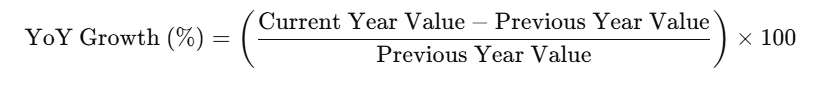

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Ensure datetime format
df_projects['start_dt'] = pd.to_datetime(df_projects['start_dt'], errors='coerce')

# Extract year and count projects
df_projects['start_dt_year'] = df_projects['start_dt'].dt.year
created_year_counts = (
    df_projects['start_dt_year']
    .value_counts()
    .sort_index()
    .reset_index()
)
created_year_counts.columns = ['Year', 'Project Count']

# YoY Growth
created_year_counts['YoY Growth (%)'] = created_year_counts['Project Count'].pct_change().fillna(0) * 100
created_year_counts['YoY Growth (%)'] = created_year_counts['YoY Growth (%)'].round(2)

# Marker color based on growth
created_year_counts['marker_color'] = created_year_counts['YoY Growth (%)'].apply(
    lambda x: 'green' if x >= 0 else 'red'
)

# Hover text
created_year_counts['hover'] = created_year_counts.apply(
    lambda row: f"Year: {row['Year']}<br>Projects: {row['Project Count']}<br>YoY Growth: {row['YoY Growth (%)']}%", axis=1
)

# Plot using plotly.graph_objects
fig = go.Figure()

# Add line trace
fig.add_trace(go.Scatter(
    x=created_year_counts['Year'],
    y=created_year_counts['Project Count'],
    mode='lines',
    line=dict(color='royalblue', width=3),
    name='Project Trend'
))

# Add colored markers
fig.add_trace(go.Scatter(
    x=created_year_counts['Year'],
    y=created_year_counts['Project Count'],
    mode='markers',
    marker=dict(
        size=10,
        color=created_year_counts['marker_color']
    ),
    hovertext=created_year_counts['hover'],
    hoverinfo='text',
    name='Growth Marker'
))

# Annotate peak year
peak_row = created_year_counts.loc[created_year_counts['Project Count'].idxmax()]
fig.add_annotation(
    x=peak_row['Year'],
    y=peak_row['Project Count'],
    text=f"Peak: {peak_row['Project Count']} projects",
    showarrow=True,
    arrowhead=2,
    ax=20,
    ay=-30,
    bgcolor='lightgreen',
    bordercolor='green'
)

# Final layout
fig.update_layout(
    title='Chart 6: Projects Start per Year with YoY Growth Indicators',
    xaxis_title='Year',
    title_x=0.5,
    yaxis_title='Project Count',
    xaxis=dict(dtick=1),
    hovermode="x unified"
)

fig.show()


# Section - 2 : EDA Insights on Project Cost Analysis Based on the Latest 18 Months.

In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add text annotation with highlighted background
fig.add_annotation(
    x=0.5,  # Positioning the text in the center (0.5 for centered alignment)
    y=0.5,  # Positioning the text in the center
    text="Section - 2 <br> EDA Insights on Project Cost Analysis Based on the Latest 18 Months.",  # Your desired text
    font=dict(
        family="Arial",  # Font family
        size=24,  # Font size
        color="white"  # Font color
    ),
    align="center",  # Center-align the text
    showarrow=False,  # No arrow
    bgcolor="green",  # Highlight color for the background
    borderpad=10,  # Padding around the text
)

# Adjust layout to center the plot and text
fig.update_layout(
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False, range=[0, 1]),  # Hide grid, ticks, zero line, and set range
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False, range=[0, 1]),  # Hide grid, ticks, zero line, and set range
    plot_bgcolor="white",  # Set background color of the plot
    # title="Highlighted Text Example",
    showlegend=False,  # Disable legend
    height=500,  # Adjust figure height
    width=1200,  # Adjust figure width
)

# Show the plot
fig.show()


### Time to Decimal Implementation

In [ ]:
def time_to_decimal(time_str):
    # Handle string input
    if isinstance(time_str, str):
        time_str = time_str.strip()

        # Check if input is a time string with colons
        if ':' in time_str:
            parts = time_str.split(':')
            try:
                parts = list(map(int, parts))
                if len(parts) == 2:
                    hours, minutes = parts
                    seconds = 0
                elif len(parts) == 3:
                    hours, minutes, seconds = parts
                else:
                    return None
                return round(hours + minutes/60 + seconds/3600, 2)
            except ValueError:
                return None

        # Check if input is a number (integer or decimal)
        try:
            value = float(time_str)
            # If it's a whole number, treat as hours
            if value.is_integer():
                return float(int(value))
            # If it's a decimal, return as is
            return round(value, 2)
        except ValueError:
            return None

    # Handle non-string input (e.g., float or int)
    elif isinstance(time_str, (int, float)):
        # If it's a whole number, treat as hours
        if float(time_str).is_integer():
            return float(int(time_str))
        # If it's a decimal, return as is
        return round(float(time_str), 2)

    return None

In [ ]:
# set(df_log_hour_issue['work_duration'].unique())
print('3','->',time_to_decimal('3'))
print('3.5','->',time_to_decimal('3.5'))
print('3:50','->',time_to_decimal('3:50'))
print('3:30:30','->',time_to_decimal('3:30:30'))
print('13','->',time_to_decimal('13'))
print('3.8','->',time_to_decimal('3.8'))
print('03:10:30','->',time_to_decimal('03:10:30'))
print('4.17','->',time_to_decimal('4.17'))
print('10:00:00','->',time_to_decimal('10:00:00'))
print('0.01','->',time_to_decimal('0.01'))
print('30','->',time_to_decimal('30'))
print('0:30','->',time_to_decimal('0:30'))
print('0:144','->',time_to_decimal('0:144'))
print('160','->',time_to_decimal('160'))
print('0.001','->',time_to_decimal('0.001'))
print('5:00','->',time_to_decimal('5:00'))
print('10:00','->',time_to_decimal('10:00'))

3 -> 3.0
3.5 -> 3.5
3:50 -> 3.83
3:30:30 -> 3.51
13 -> 13.0
3.8 -> 3.8
03:10:30 -> 3.17
4.17 -> 4.17
10:00:00 -> 10.0
0.01 -> 0.01
30 -> 30.0
0:30 -> 0.5
0:144 -> 2.4
160 -> 160.0
0.001 -> 0.0
5:00 -> 5.0
10:00 -> 10.0


### Project & Unique Milestone Distribution + Effort

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === Prepare Data ===

# 1) Unique projects per category (Pie 1)
unique_project_counts = (
    df_log_hour_issue
      .assign(EBS_project_name=lambda d: d['EBS_project_name'].astype(str).str.strip())
      .groupby('ProjectCategory')['EBS_project_name']
      .nunique(dropna=True)
      .reset_index()
      .rename(columns={'EBS_project_name': 'Unique Project Count'})
)

# 2) UNIQUE milestones per category (Pie 2)  <-- FIXED
MILESTONE_COL = 'Milestone'  # <-- change this if your column has a different name
milestone_counts = (
    df_log_hour_issue
      .assign(**{MILESTONE_COL: df_log_hour_issue[MILESTONE_COL].astype(str).str.strip()})
      .groupby('ProjectCategory')[MILESTONE_COL]
      .nunique(dropna=True)
      .reset_index(name='Unique Milestone Count')
)

# 3) Total hours per category (Bar)
df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)
total_hour_counts = (
    df_log_hour_issue
      .groupby('ProjectCategory', as_index=False)['work_hours']
      .sum()
)
total_hour_counts['Days'] = total_hour_counts['work_hours'] / 8.0

# === Create Subplots ===
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'xy'}]],
    subplot_titles=[
        "<b>Projects by Category</b>",
        "<b>Unique Milestones by Category</b>",   # updated title
        "<b>Total Effort (Hours) by Category</b>"
    ],
    column_widths=[0.3, 0.3, 0.4]
)

# --- Pie 1: Unique Projects ---
fig.add_trace(
    go.Pie(
        labels=unique_project_counts['ProjectCategory'],
        values=unique_project_counts['Unique Project Count'],
        textinfo='label+value+percent',
        name="Unique Projects",
        marker=dict(colors=[project_category_color_discrete_map.get(cat, '#ccc')
                            for cat in unique_project_counts['ProjectCategory']]),
        hole=0.1
    ),
    row=1, col=1
)

# --- Pie 2: Unique Milestones ---
fig.add_trace(
    go.Pie(
        labels=milestone_counts['ProjectCategory'],
        values=milestone_counts['Unique Milestone Count'],
        textinfo='label+value+percent',
        name="Unique Milestones",
        marker=dict(colors=[project_category_color_discrete_map.get(cat, '#ccc')
                            for cat in milestone_counts['ProjectCategory']]),
        hole=0.1
    ),
    row=1, col=2
)

# --- Bar: Total Hours ---
fig.add_trace(
    go.Bar(
        x=total_hour_counts['ProjectCategory'],
        y=total_hour_counts['work_hours'],
        marker_color=[project_category_color_discrete_map.get(cat, '#ccc')
                      for cat in total_hour_counts['ProjectCategory']],
        text=total_hour_counts['work_hours'].round(2),
        textposition='auto',
        name="work_hours",
        customdata=total_hour_counts['Days'],
        hovertemplate="<b>%{x}</b><br>Total: %{y:.2f} hours<br>≈ %{customdata:.2f} days (8h/day)<extra></extra>",
    ),
    row=1, col=3
)

# --- Layout ---
fig.update_layout(
    title_text="Chart 7: Project & Unique Milestone Distribution + Effort",
    title_x=0.5,
    height=500,
    margin=dict(t=60, b=100, l=40, r=40),
    showlegend=False
)
fig.update_yaxes(title_text="Total Hour", row=1, col=3)
fig.update_xaxes(title_text="Project Category", row=1, col=3)

fig.show()


## Top 10 Projects by Total Hours — filter by Project Category

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import re

# --- config ---
COST_PER_HOUR = 1000  # ৳ per hour

def count_issues(s: pd.Series) -> int:
    return s.dropna().astype(str).str.strip().ne('').sum()

def first_nonempty(s: pd.Series):
    s = s.dropna().astype(str).str.strip()
    s = s[s.ne('')]
    return s.iloc[0] if not s.empty else None

# Reusable hover template
# customdata order:
# [days, expected_cost, issue_count, person_count, milestone_count,
#  ProjectCategory, project_type, accounts_name, Assign_to]
HOVER_TMPL = (
    "<b>%{y}</b><br>"
    "Total Hours: %{x:.2f} h<br>"
    "Expected Cost: ৳ %{customdata[1]}<br>"
    "≈ %{customdata[0]:.2f} days (8h/day)<br>"
    "Log Entry Count: %{customdata[2]}<br>"
    "Number of Resource: %{customdata[3]}<br>"
    "Number of Milestone: %{customdata[4]}<br>"
    "Category: %{customdata[5]}<br>"
    "Project Type: %{customdata[6]}<br>"
    "Account/Client Name: %{customdata[7]}<br>"
    "Assign To: %{customdata[8]}"
    "<extra></extra>"
)

# --- data & aggregate per project ---
df = df_log_hour_issue.copy()  # Assuming df_log_hour_issue is already available
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

proj_agg = (
    df.dropna(subset=['EBS_project_name'])
      .groupby('EBS_project_name', as_index=False)
      .agg(
          total_hours     = ('work_hours', 'sum'),
          issue_count     = ('issue_details', count_issues),
          person_count    = ('user_email', lambda s: s.dropna().nunique()),
          milestone_count = ('Milestone',  lambda s: s.dropna().nunique()),
          ProjectCategory = ('ProjectCategory', lambda s: s.mode().iat[0] if not s.mode().empty else None),
          project_type    = ('type',            lambda s: s.mode().iat[0] if not s.mode().empty else None),
      )
)

# safety fills
proj_agg['total_hours']     = proj_agg['total_hours'].fillna(0.0)
proj_agg['issue_count']     = proj_agg['issue_count'].fillna(0).astype(int)
proj_agg['person_count']    = proj_agg['person_count'].fillna(0).astype(int)
proj_agg['milestone_count'] = proj_agg['milestone_count'].fillna(0).astype(int)

# derived
proj_agg['days']          = proj_agg['total_hours'] / 8.0
proj_agg['expected_cost'] = proj_agg['total_hours'] * COST_PER_HOUR

# Apply the BD formatting for expected cost
proj_agg['expected_cost_bd'] = proj_agg['expected_cost'].apply(format_bd_comma)

# --- prepare df_projects mapping (ref_no -> accounts_name, Assign_to) ---
proj_meta = (
    df_projects
      .dropna(subset=['ref_no'])
      .groupby('ref_no', as_index=False)
      .agg(
          accounts_name=('accounts_name', first_nonempty),
          Assign_to    =('Assign_to',     first_nonempty)
      )
)

# merge meta into aggregation using EBS_project_name == ref_no
proj_agg = proj_agg.merge(
    proj_meta, left_on='EBS_project_name', right_on='ref_no', how='left'
).drop(columns=['ref_no'])

# friendly fallbacks
proj_agg['accounts_name'] = proj_agg['accounts_name'].fillna('—')
proj_agg['Assign_to']     = proj_agg['Assign_to'].fillna('—')

# --- category list ---
categories = ['All'] + sorted([c for c in proj_agg['ProjectCategory'].dropna().unique()])

# --- helpers for top-10 by HOURS ---
top_n = 10
def top_df_for_hours(cat):
    d = proj_agg if cat == 'All' else proj_agg[proj_agg['ProjectCategory'] == cat]
    return d.sort_values('total_hours', ascending=False).head(top_n).reset_index(drop=True)

def colors_for(cat, d):
    if 'project_category_color_discrete_map' in globals():
        if cat == 'All':
            return d['ProjectCategory'].map(project_category_color_discrete_map).fillna('#636EFA').tolist()
        return [project_category_color_discrete_map.get(cat, '#636EFA')] * len(d)
    return ['#636EFA'] * len(d)

# --- build figure ---
init_cat = 'All'
d0 = top_df_for_hours(init_cat)
c0 = colors_for(init_cat, d0)

fig = go.Figure()

fig.add_bar(
    x=d0['total_hours'],
    y=d0['EBS_project_name'],
    orientation='h',
    marker=dict(color=c0),
    # show formatted expected cost in bar text
    text=[
        f"Resource: {p}|Hours: {h:.1f}h|Est: ৳ {fmt}|Milestone: {m}|Logs Entry: {i}|Assigned: {a}"
        for h,i,p,m,a,fmt in zip(
            d0['total_hours'], d0['issue_count'], d0['person_count'],
            d0['milestone_count'], d0['Assign_to'], d0['expected_cost_bd']
        )
    ],
    textposition='auto',
    # extend customdata with two extra fields at the end: unit_en, unit_bn
    customdata=d0[['days','expected_cost_bd','issue_count','person_count','milestone_count',
                   'ProjectCategory','project_type','accounts_name','Assign_to']].values,
    hovertemplate=HOVER_TMPL,
    name="Total Hours"
)

# --- frames ---
frames = []
for cat in categories:
    d = top_df_for_hours(cat)
    c = colors_for(cat, d)
    frames.append(go.Frame(
        name=cat,
        data=[go.Bar(
            x=d['total_hours'],
            y=d['EBS_project_name'],
            orientation='h',
            marker=dict(color=c),
            text=[
                f"Resource: {p}|Hours: {h:.1f}h|Est: ৳ {fmt}|Milestone: {m}|Logs Entry: {i}|Assigned: {a}"
                for h,i,p,m,a,fmt in zip(
                    d['total_hours'], d['issue_count'], d['person_count'],
                    d['milestone_count'], d['Assign_to'], d['expected_cost_bd']
                )
            ],
            textposition='auto',
            customdata=d[['days','expected_cost_bd','issue_count','person_count','milestone_count',
                          'ProjectCategory','project_type','accounts_name','Assign_to']].values,
            hovertemplate=HOVER_TMPL,
            name="Total Hours"
        )]
    ))
fig.frames = frames

# --- dropdown & layout ---
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        direction="down",
        x=1, y=1.12, xanchor="center", yanchor="top",
        buttons=[dict(label=cat, method="animate",
                     args=[[cat], {"mode":"immediate","frame":{"duration":0,"redraw":True},"transition":{"duration":0}}])
                 for cat in categories],
        showactive=True
    )],
    title="Chart 8: Top 10 Projects by Total Hours — filter by Project Category",
    title_x=0.5,
    xaxis_title="Total Hours",
    yaxis_title="Project",
    bargap=0.2,
    height=650,
    margin=dict(l=160, r=40, t=80, b=60),
    hovermode='y unified',
    hoverdistance=-1,
    hoverlabel=dict(namelength=-1)
)

# biggest on top
fig.update_yaxes(autorange="reversed")

fig.show()


## Team-wise Ranking by Total Logged Hours

In [ ]:
import pandas as pd
import plotly.express as px

COST_PER_HOUR = 1000  # ৳ per hour

def uniq_join(series, limit=12):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br>".join(vals)
    return "<br>".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# --- prep data ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- aggregate per team ---
team_agg = (
    df.dropna(subset=['team_name'])
      .groupby('team_name', as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          member_count=('user_email', lambda s: s.dropna().nunique()),
          project_count=('EBS_project_name', lambda s: s.dropna().nunique()),
          milestone_count=('Milestone', lambda s: s.dropna().nunique()),
          member_emails=('user_email', lambda s: uniq_join(s, limit=20))  # ← emails for hover
      )
)

# derived
team_agg['days'] = team_agg['total_hours'] / 8.0
team_agg['expected_cost'] = team_agg['total_hours'] * COST_PER_HOUR  # ✅ add cost
# Apply the BD formatting for expected cost
team_agg['expected_cost_bd'] = team_agg['expected_cost'].apply(format_bd_comma)

# sort + rank
team_agg = team_agg.sort_values('total_hours', ascending=False).reset_index(drop=True)
team_agg['rank'] = team_agg.index + 1
team_agg['team_label'] = team_agg['rank'].astype(str) + '. ' + team_agg['team_name']

# optional: top-N
top_n = 20
plot_df = team_agg.head(top_n).copy()

# bar text (includes expected cost)
plot_df['label'] = plot_df.apply(
    lambda r: (
        f"Resource: {int(r['member_count'])}|Hours: {r['total_hours']:.1f}h|Est: ৳{r['expected_cost_bd']}|Logs Entry: {int(r['log_count'])}"
    ),
    axis=1
)

# --- chart: team-wise ranking by hours ---
fig = px.bar(
    plot_df,
    x='total_hours',
    y='team_label',
    orientation='h',
    color='total_hours',
    color_continuous_scale='RdYlGn',
    text='label',
    title='Chart 9: Team-wise Ranking by Total Logged Hours',
    labels={'team_label': 'Team (ranked)', 'total_hours': 'Total Hours'},
    custom_data=['days','expected_cost_bd','member_count','project_count','milestone_count','log_count','team_name','member_emails']
)

fig.update_traces(
    textposition='auto',
    hovertemplate=(
        "<b>%{customdata[6]}</b><br>"
        "Total Hours: %{x:.2f} h<br>"
        "Expected Cost: ৳ %{customdata[1]}<br>"
        "≈ %{customdata[0]:.2f} days (8h/day)<br>"
        "Number of Resource: %{customdata[2]}<br>"
        "Projects: %{customdata[3]}<br>"
        "Milestones: %{customdata[4]}<br>"
        "Logs Entry: %{customdata[5]}<br>"
        "<br><b>Resource Emails </b>:<br>%{customdata[7]}<extra></extra>"
    )
)

fig.update_layout(
    hovermode='y unified',
    hoverdistance=-1,
    title_x=0.5,
    bargap=0.2,
    height=800,
    margin=dict(l=200, r=60, t=80, b=60),
    coloraxis_colorbar=dict(title="Hours")
)

# biggest on top
fig.update_yaxes(autorange='reversed')

fig.show()


### Team-wise Ranking by Average Logged Hours per Resource

In [ ]:
import pandas as pd
import plotly.express as px

COST_PER_HOUR = 1000  # ৳ per hour
def uniq_join(series, limit=12):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br>".join(vals)
    return "<br>".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# --- prep data ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- aggregate per team ---
team_agg = (
    df.dropna(subset=['team_name'])
      .groupby('team_name', as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          member_count=('user_email', lambda s: s.dropna().nunique()),
          project_count=('EBS_project_name', lambda s: s.dropna().nunique()),
          milestone_count=('Milestone', lambda s: s.dropna().nunique()),
          member_emails=('user_email', lambda s: uniq_join(s, limit=20))  # ← emails for hover
      )
)

# derived
team_agg['avg_hours'] = team_agg['total_hours'] / team_agg['member_count']
team_agg['days'] = team_agg['total_hours'] / 8.0
team_agg['expected_cost'] = team_agg['total_hours'] * COST_PER_HOUR  # ✅ add cost
team_agg['expected_cost_bd'] = team_agg['expected_cost'].apply(format_bd_comma)

# sort + rank
team_agg = team_agg.sort_values('avg_hours', ascending=False).reset_index(drop=True)
team_agg['rank'] = team_agg.index + 1
team_agg['team_label'] = team_agg['rank'].astype(str) + '. ' + team_agg['team_name']

# optional: top-N
top_n = 20
plot_df = team_agg.head(top_n).copy()

# bar text (includes expected cost)
plot_df['label'] = plot_df.apply(
    lambda r: (
        f"Avg: {r['avg_hours']:.1f}h/res|H: {r['total_hours']:.1f}h|Est: ৳ {r['expected_cost_bd']}|"
        f"Resource: {int(r['member_count'])}|Logs Entry: {int(r['log_count'])}"
    ),
    axis=1
)

# --- chart: team-wise ranking by hours ---
fig = px.bar(
    plot_df,
    x='avg_hours',
    y='team_label',
    orientation='h',
    color='avg_hours',
    color_continuous_scale='RdYlGn',
    text='label',
    title='Chart 10: Team-wise Ranking by Average Logged Hours per Resource',
    labels={'team_label': 'Team (ranked)', 'avg_hours': 'Average Hours per Resource'},

    custom_data=['total_hours','days','expected_cost_bd','member_count','project_count','milestone_count','log_count','team_name','member_emails']
)

fig.update_traces(
    textposition='auto',
    hovertemplate=(
        "<b>%{customdata[7]}</b><br>"
        "Average Hours per Resource: %{x:.2f} h<br>"
        "Total Hours: %{customdata[0]:.2f} h<br>"
        "Expected Cost: ৳ %{customdata[2]} <br>"
        "≈ %{customdata[1]:.2f} days (8h/day)<br>"
        "Number of Resource: %{customdata[3]}<br>"
        "Projects: %{customdata[4]}<br>"
        "Milestones: %{customdata[5]}<br>"
        "Logs Entry: %{customdata[6]}<br>"
        "<br><b>Resource Emails </b>:<br>%{customdata[8]}<extra></extra>"

    )
)

fig.update_layout(
    hovermode='y unified',
    hoverdistance=-1,
    title_x=0.5,
    bargap=0.2,
    height=800,
    margin=dict(l=200, r=60, t=80, b=60),
    coloraxis_colorbar=dict(title="Avg Hours")
)

# biggest on top
fig.update_yaxes(autorange='reversed')

fig.show()

### Team Ranking by Project Category (Top 10 by Hours)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

COST_PER_HOUR = 1000   # ৳ per hour
TOP_N = 10
CATEGORY = "commercial"

# --- Base & filter ---
df = df_log_hour_issue.copy()

# Make sure work_hours exists
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# Normalize category text a bit (optional but helpful)
df['ProjectCategory'] = df['ProjectCategory'].astype(str).str.strip()
df = df[df['ProjectCategory'].str.lower() == CATEGORY.lower()]

# Early exit if nothing to show
if df.empty:
    raise ValueError(f'No rows found for ProjectCategory="{CATEGORY}".')

# --- Aggregate per team (within the category) ---
team_stats = (
    df.dropna(subset=['team_name'])
      .groupby('team_name', as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          project_count=('EBS_project_name', lambda s: s.dropna().nunique()),
          member_count=('user_email', lambda s: s.dropna().nunique()),
          ProjectCategory=('ProjectCategory', 'first')  # Get the category of the team
      )
)

# Derived metrics
team_stats['days'] = team_stats['total_hours'] / 8.0
team_stats['expected_cost'] = team_stats['total_hours'] * COST_PER_HOUR
team_stats['expected_cost_bd'] = team_stats['expected_cost'].apply(format_bd_comma)

# Ranking (Top N by total_hours)
team_stats = team_stats.sort_values('total_hours', ascending=False).head(TOP_N).reset_index(drop=True)
team_stats['rank'] = team_stats.index + 1
team_stats['team_label'] = team_stats['rank'].astype(str) + '. ' + team_stats['team_name']

# --- Map ProjectCategory to color using project_category_color_discrete_map ---
team_stats['color'] = team_stats['ProjectCategory'].map(project_category_color_discrete_map)

# --- Plot ---
fig = go.Figure()

fig.add_bar(
    x=team_stats['total_hours'],
    y=team_stats['team_label'],
    orientation='h',
    marker=dict(color=team_stats['color']),
    text=[
        f"Hour: {h:.1f}h|Est: ৳ {cost}|Project: {int(p)}|Resource: {int(m)}|Logs Entry: {int(l)}"
        for h, cost, p, m, l in zip(
            team_stats['total_hours'],
            team_stats['expected_cost_bd'],
            team_stats['project_count'],
            team_stats['member_count'],
            team_stats['log_count']
        )
    ],
    textposition='auto',
    # customdata: [days, expected_cost, project_count, member_count, log_count, team_name]
    customdata=team_stats[['days','expected_cost_bd','project_count','member_count','log_count','team_name']].values,
    hovertemplate=(
        "<b>%{customdata[5]}</b> — " + CATEGORY.title() + "<br>"
        "Total Hours: %{x:.2f} h<br>"
        "Expected Cost: ৳ %{customdata[1]} <br>"
        "≈ %{customdata[0]:.2f} days (8h/day)<br>"
        "Projects: %{customdata[2]}<br>"
        "Number of Resource: %{customdata[3]}<br>"
        "Logs Entry: %{customdata[4]}<extra></extra>"
    ),
    name="Hours"
)

# Biggest at top
fig.update_yaxes(autorange='reversed')

fig.update_layout(
    title=f"Chart 11: Team Ranking — {CATEGORY.title()} (Top {TOP_N} by Total Hours)",
    title_x=0.5,
    xaxis_title="Total Hours",
    yaxis_title="Team (ranked)",
    hovermode='y unified',
    bargap=0.2,
    height=650,
    margin=dict(l=220, r=60, t=90, b=60),
    coloraxis_colorbar=dict(title="Hours")
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

COST_PER_HOUR = 1000   # ৳ per hour
TOP_N = 10
CATEGORY = "Non-commercial"

# --- Base & filter ---
df = df_log_hour_issue.copy()

# Make sure work_hours exists
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# Normalize category text a bit (optional but helpful)
df['ProjectCategory'] = df['ProjectCategory'].astype(str).str.strip()
df = df[df['ProjectCategory'].str.lower() == CATEGORY.lower()]

# Early exit if nothing to show
if df.empty:
    raise ValueError(f'No rows found for ProjectCategory="{CATEGORY}".')

# --- Aggregate per team (within the category) ---
team_stats = (
    df.dropna(subset=['team_name'])
      .groupby('team_name', as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          project_count=('EBS_project_name', lambda s: s.dropna().nunique()),
          member_count=('user_email', lambda s: s.dropna().nunique()),
          ProjectCategory=('ProjectCategory', 'first')  # Get the category of the team
      )
)

# Derived metrics
team_stats['days'] = team_stats['total_hours'] / 8.0
team_stats['expected_cost'] = team_stats['total_hours'] * COST_PER_HOUR
team_stats['expected_cost_bd'] = team_stats['expected_cost'].apply(format_bd_comma)

# Ranking (Top N by total_hours)
team_stats = team_stats.sort_values('total_hours', ascending=False).head(TOP_N).reset_index(drop=True)
team_stats['rank'] = team_stats.index + 1
team_stats['team_label'] = team_stats['rank'].astype(str) + '. ' + team_stats['team_name']

# --- Map ProjectCategory to color using project_category_color_discrete_map ---
team_stats['color'] = team_stats['ProjectCategory'].map(project_category_color_discrete_map)

# --- Plot ---
fig = go.Figure()

fig.add_bar(
    x=team_stats['total_hours'],
    y=team_stats['team_label'],
    orientation='h',
    marker=dict(color=team_stats['color']),
    text=[
        f"Hour: {h:.1f}h|Est: ৳ {cost}|Project: {int(p)}|Resource: {int(m)}|Logs Entry: {int(l)}"
        for h, cost, p, m, l in zip(
            team_stats['total_hours'],
            team_stats['expected_cost_bd'],
            team_stats['project_count'],
            team_stats['member_count'],
            team_stats['log_count']
        )
    ],
    textposition='auto',
    # customdata: [days, expected_cost, project_count, member_count, log_count, team_name]
    customdata=team_stats[['days','expected_cost_bd','project_count','member_count','log_count','team_name']].values,
    hovertemplate=(
        "<b>%{customdata[5]}</b> — " + CATEGORY.title() + "<br>"
        "Total Hours: %{x:.2f} h<br>"
        "Expected Cost: ৳ %{customdata[1]} <br>"
        "≈ %{customdata[0]:.2f} days (8h/day)<br>"
        "Projects: %{customdata[2]}<br>"
        "Number of Resource: %{customdata[3]}<br>"
        "Logs Entry: %{customdata[4]}<extra></extra>"
    ),
    name="Hours"
)

# Biggest at top
fig.update_yaxes(autorange='reversed')

fig.update_layout(
    title=f"Chart 12: Team Ranking — {CATEGORY.title()} (Top {TOP_N} by Total Hours)",
    title_x=0.5,
    xaxis_title="Total Hours",
    yaxis_title="Team (ranked)",
    hovermode='y unified',
    bargap=0.2,
    height=650,
    margin=dict(l=220, r=60, t=90, b=60),
    coloraxis_colorbar=dict(title="Hours")
)

fig.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

COST_PER_HOUR = 1000   # ৳ per hour
TOP_N = 10
CATEGORY = "Others"

# --- Base & filter ---
df = df_log_hour_issue.copy()

# Make sure work_hours exists
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# Normalize category text a bit (optional but helpful)
df['ProjectCategory'] = df['ProjectCategory'].astype(str).str.strip()
df = df[df['ProjectCategory'].str.lower() == CATEGORY.lower()]

# Early exit if nothing to show
if df.empty:
    raise ValueError(f'No rows found for ProjectCategory="{CATEGORY}".')

# --- Aggregate per team (within the category) ---
team_stats = (
    df.dropna(subset=['team_name'])
      .groupby('team_name', as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          project_count=('EBS_project_name', lambda s: s.dropna().nunique()),
          member_count=('user_email', lambda s: s.dropna().nunique()),
          ProjectCategory=('ProjectCategory', 'first')  # Get the category of the team
      )
)

# Derived metrics
team_stats['days'] = team_stats['total_hours'] / 8.0
team_stats['expected_cost'] = team_stats['total_hours'] * COST_PER_HOUR
team_stats['expected_cost_bd'] = team_stats['expected_cost'].apply(format_bd_comma)

# Ranking (Top N by total_hours)
team_stats = team_stats.sort_values('total_hours', ascending=False).head(TOP_N).reset_index(drop=True)
team_stats['rank'] = team_stats.index + 1
team_stats['team_label'] = team_stats['rank'].astype(str) + '. ' + team_stats['team_name']

# --- Map ProjectCategory to color using project_category_color_discrete_map ---
team_stats['color'] = team_stats['ProjectCategory'].map(project_category_color_discrete_map)

# --- Plot ---
fig = go.Figure()

fig.add_bar(
    x=team_stats['total_hours'],
    y=team_stats['team_label'],
    orientation='h',
    marker=dict(color=team_stats['color']),
    text=[
        f"Hour: {h:.1f}h|Est: ৳ {cost}|Project: {int(p)}|Resource: {int(m)}|Logs Entry: {int(l)}"
        for h, cost, p, m, l in zip(
            team_stats['total_hours'],
            team_stats['expected_cost_bd'],
            team_stats['project_count'],
            team_stats['member_count'],
            team_stats['log_count']
        )
    ],
    textposition='auto',
    # customdata: [days, expected_cost, project_count, member_count, log_count, team_name]
    customdata=team_stats[['days','expected_cost_bd','project_count','member_count','log_count','team_name']].values,
    hovertemplate=(
        "<b>%{customdata[5]}</b> — " + CATEGORY.title() + "<br>"
        "Total Hours: %{x:.2f} h<br>"
        "Expected Cost: ৳ %{customdata[1]}<br>"
        "≈ %{customdata[0]:.2f} days (8h/day)<br>"
        "Projects: %{customdata[2]}<br>"
        "Number of Resource: %{customdata[3]}<br>"
        "Logs Entry: %{customdata[4]}<extra></extra>"
    ),
    name="Hours"
)

# Biggest at top
fig.update_yaxes(autorange='reversed')

fig.update_layout(
    title=f"Chart 13: Team Ranking — {CATEGORY.title()} (Top {TOP_N} by Total Hours)",
    title_x=0.5,
    xaxis_title="Total Hours",
    yaxis_title="Team (ranked)",
    hovermode='y unified',
    bargap=0.2,
    height=650,
    margin=dict(l=220, r=60, t=90, b=60),
    coloraxis_colorbar=dict(title="Hours")
)

fig.show()


### Team Ranking by Filtering Project Category (Top 10 by Hours)

In [ ]:
import pandas as pd
import plotly.graph_objects as go

COST_PER_HOUR = 1000  # ৳ per hour
TOP_N = 10

# --- Base data ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- Aggregate per (ProjectCategory, team) ---
team_cat = (
    df.dropna(subset=['ProjectCategory', 'team_name'])
      .groupby(['ProjectCategory', 'team_name'], as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          project_count=('EBS_project_name', lambda s: s.dropna().nunique()),
          member_count=('user_email', lambda s: s.dropna().nunique())
      )
)

# Derived metrics
team_cat['days'] = team_cat['total_hours'] / 8.0
team_cat['expected_cost'] = team_cat['total_hours'] * COST_PER_HOUR
team_cat['expected_cost_bd'] = team_cat['expected_cost'].apply(format_bd_comma)

# Categories
categories = sorted(team_cat['ProjectCategory'].dropna().unique().tolist())

def top_df(cat):
    d = team_cat[team_cat['ProjectCategory'] == cat].sort_values('total_hours', ascending=False).head(TOP_N).copy()
    d.reset_index(drop=True, inplace=True)
    d['rank'] = d.index + 1
    d['team_label'] = d['rank'].astype(str) + '. ' + d['team_name']
    return d

# --- Initial category ---
init_cat = categories[0] if categories else None
d0 = top_df(init_cat) if init_cat else team_cat.head(0)

# --- Apply project_category_color_discrete_map ---
# Map each ProjectCategory to the respective color
d0['color'] = d0['ProjectCategory'].map(project_category_color_discrete_map).fillna('gray')  # Default to 'gray' if no color found

# Build figure
fig = go.Figure()

fig.add_bar(
    x=d0['total_hours'],
    y=d0['team_label'],
    orientation='h',
    marker=dict(color=d0['color']),
    text=[f"Hour:{h:.1f}h | Est: ৳{cost} | Project:{int(p)} | Resource:{int(m)} | Logs:{int(l)}"
          for h, cost, p, m, l in zip(d0['total_hours'], d0['expected_cost_bd'], d0['project_count'], d0['member_count'], d0['log_count'])],
    textposition='auto',
    customdata=d0[['days', 'expected_cost_bd', 'project_count', 'member_count', 'log_count', 'team_name', 'ProjectCategory']].values,
    hovertemplate=(
        "<b>%{customdata[5]}</b> — %{customdata[6]}<br>"
        "Total Hours: %{x:.2f} h<br>"
        "Expected Cost: ৳ %{customdata[1]}<br>"
        "≈ %{customdata[0]:.2f} days (8h/day)<br>"
        "Projects: %{customdata[2]}<br>"
        "Number of Resource: %{customdata[3]}<br>"
        "Log Count: %{customdata[4]}<extra></extra>"
    ),
    name="Hours"
)

# --- Frames for each category ---
frames = []
for cat in categories:
    d = top_df(cat)
    # Map each ProjectCategory to the respective color for each frame
    d['color'] = d['ProjectCategory'].map(project_category_color_discrete_map).fillna('gray')  # Default to 'gray'

    frames.append(go.Frame(
        name=cat,
        data=[go.Bar(
            x=d['total_hours'],
            y=d['team_label'],
            orientation='h',
            marker=dict(color=d['color']),
            text=[f"Hour:{h:.1f}h | Est: ৳{cost} | Project:{int(p)} | Resource:{int(m)} | Logs:{int(l)}"
                  for h, cost, p, m, l in zip(d['total_hours'], d['expected_cost_bd'], d['project_count'], d['member_count'], d['log_count'])],
            textposition='auto',
            customdata=d[['days', 'expected_cost_bd', 'project_count', 'member_count', 'log_count', 'team_name', 'ProjectCategory']].values,
            hovertemplate=(
                "<b>%{customdata[5]}</b> — %{customdata[6]}<br>"
                "Total Hours: %{x:.2f} h<br>"
                "Expected Cost: %{customdata[1]} ৳<br>"
                "≈ %{customdata[0]:.2f} days (8h/day)<br>"
                "Projects: %{customdata[2]}<br>"
                "Number of Resource: %{customdata[3]}<br>"
                "Log Count: %{customdata[4]}<extra></extra>"
            ),
            name="Hours"
        )]
    ))
fig.frames = frames

# --- Dropdown to pick ProjectCategory ---
fig.update_layout(
    updatemenus=[dict(
        type="dropdown",
        x=1, y=1.12, xanchor="center", yanchor="top",
        showactive=True,
        buttons=[
            dict(label=cat, method="animate",
                 args=[[cat], {"mode": "immediate", "frame": {"duration": 0, "redraw": True}, "transition": {"duration": 0}}])
            for cat in categories
        ],
    )],
    title="Chart 14: Team Ranking by Filtering Project Category (Top 10 by Hours)",
    title_x=0.5,
    xaxis_title="Total Hours",
    yaxis_title="Team (ranked)",
    hovermode='y unified',
    hoverdistance=-1,
    bargap=0.2,
    height=650,
    margin=dict(l=220, r=60, t=90, b=60),
    coloraxis_colorbar=dict(title="Hours")
)

# Biggest on top
fig.update_yaxes(autorange='reversed')

fig.show()


### Team Ranking by Total Hours - Project Category Distribution

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- Base data preparation ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- Aggregate total hours per (team, ProjectCategory) ---
team_category_hours = (
    df.dropna(subset=['ProjectCategory', 'team_name'])
      .groupby(['team_name', 'ProjectCategory'], as_index=False)
      .agg(
          total_hours=('work_hours', 'sum')  # Sum of work hours
      )
)

# Pivot to get categories as columns for easier stacking
pivot_df = team_category_hours.pivot(
    index='team_name',
    columns='ProjectCategory',
    values='total_hours'
).fillna(0)

# Get all teams and ensure we have all three categories
all_teams = pivot_df.index.tolist()

# Define the three main categories (adjust names as per your actual data)
categories = ['Commercial', 'Non-Commercial', 'Others']

# Ensure all categories exist in the dataframe (add missing ones with 0)
for cat in categories:
    if cat not in pivot_df.columns:
        pivot_df[cat] = 0

# Sort teams by total hours (descending) and add ranking
pivot_df['total_hours'] = pivot_df[categories].sum(axis=1)
pivot_df = pivot_df.sort_values('total_hours', ascending=False)

# Add ranking
pivot_df['rank'] = range(1, len(pivot_df) + 1)
pivot_df['team_label'] = pivot_df['rank'].astype(str) + '. ' + pivot_df.index

# Remove the total column for plotting (keep for reference)
plot_df = pivot_df[categories].copy()
plot_df.index = pivot_df['team_label']  # Use ranked team labels

# Create the stacked bar chart
fig = go.Figure()

# Add traces for each category
for category in categories:
    if category in plot_df.columns:
        fig.add_trace(
            go.Bar(
                name=category,
                x=plot_df.index,
                y=plot_df[category],
                marker_color=project_category_color_discrete_map[category],
                hovertemplate=(
                    f"<b>{category}</b><br>"
                    "Team: %{x}<br>"
                    "Hours: %{y:.1f}h<br>"
                    "<extra></extra>"
                )
            )
        )

# Update layout for stacked bars
fig.update_layout(
    barmode='stack',
    title="Chart 15: Team Ranking by Total Hours - Project Category Distribution",
    title_x=0.5,
    xaxis_title="Team Ranking (Based on Total Hours)",
    yaxis_title="Total Hours",
    # hovermode='x unified',
    legend=dict(
        orientation='h',
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    margin=dict(l=60, r=60, t=100, b=150),  # Extra bottom margin for long team names
    height=700
)

# Rotate x-axis labels if team names are long
fig.update_xaxes(tickangle=45)

# Add total hours annotations on top of each bar
for i, team_label in enumerate(plot_df.index):
    total_hours = plot_df.loc[team_label, categories].sum()
    fig.add_annotation(
        x=i,
        y=total_hours + max(plot_df[categories].sum(axis=1)) * 0.02,  # Slightly above the bar
        text=f"{total_hours:.1f}h",
        showarrow=False,
        font=dict(size=10, color="black")
    )

fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- Base data preparation ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- Aggregate total hours per (team, ProjectCategory) ---
team_category_hours = (
    df.dropna(subset=['ProjectCategory', 'team_name'])
      .groupby(['team_name', 'ProjectCategory'], as_index=False)
      .agg(
          total_hours=('work_hours', 'sum')  # Sum of work hours
      )
)

# Pivot to get categories as columns for easier stacking
pivot_df = team_category_hours.pivot(
    index='team_name',
    columns='ProjectCategory',
    values='total_hours'
).fillna(0)

# Get all teams and ensure we have all three categories
all_teams = pivot_df.index.tolist()

# Define the three main categories (adjust names as per your actual data)
categories = ['Commercial', 'Non-Commercial', 'Others']

# Ensure all categories exist in the dataframe (add missing ones with 0)
for cat in categories:
    if cat not in pivot_df.columns:
        pivot_df[cat] = 0

# Sort teams by total hours (descending) and add ranking
pivot_df['total_hours'] = pivot_df[categories].sum(axis=1)
pivot_df = pivot_df.sort_values('total_hours', ascending=False)

# Add ranking
pivot_df['rank'] = range(1, len(pivot_df) + 1)
pivot_df['team_label'] = pivot_df['rank'].astype(str) + '. ' + pivot_df.index

# Remove the total column for plotting (keep for reference)
plot_df = pivot_df[categories].copy()
plot_df.index = pivot_df['team_label']  # Use ranked team labels

# Create the stacked bar chart
fig = go.Figure()

# Add traces for each category
for category in categories:
    if category in plot_df.columns:
        fig.add_trace(
            go.Bar(
                name=category,
                x=plot_df.index,
                y=plot_df[category],
                marker_color=project_category_color_discrete_map[category],
                text=plot_df[category],
                hovertemplate=(
                    f"<b>{category}</b><br>"
                    "Team: %{x}<br>"
                    "Hours: %{y:.1f}h<br>"
                    "<extra></extra>"
                )
            )
        )

# Update layout for stacked bars
fig.update_layout(
    barmode='group',
    title="Chart 16: Team Ranking by Total Hours - Project Category Distribution",
    title_x=0.5,
    xaxis_title="Team Ranking (Based on Total Hours)",
    yaxis_title="Total Hours",
    # hovermode='x unified',
    legend=dict(
        orientation='h',
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    margin=dict(l=60, r=60, t=100, b=150),  # Extra bottom margin for long team names
    height=700
)

### Team vs Project Category — Project Count & Share

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- CONFIG ---
USE_UNIQUE_PROJECTS = True   # count unique EBS_project_name per team/category
TOP_TEAMS = None             # set an int to show only top-N teams by count for the selected category

# --- Helpers ---
def clean_project_name(row):
    name = ('' if pd.isna(row['EBS_project_name']) else str(row['EBS_project_name']).strip())
    if name == '' and str(row.get('ProjectCategory', '')).strip() == 'Others':
        return 'Anonymous'
    return name or 'Unnamed'

# --- Base ---
df = df_log_hour_issue.copy()
df['ProjectNameFixed'] = df.apply(clean_project_name, axis=1)
df = df.dropna(subset=['team_name', 'ProjectCategory']).copy()

if USE_UNIQUE_PROJECTS:
    per_tc = (
        df[['team_name', 'ProjectCategory', 'ProjectNameFixed']]
        .drop_duplicates()
        .groupby(['team_name', 'ProjectCategory'], as_index=False)
        .size().rename(columns={'size': 'project_count'})
    )
    team_totals = (
        df[['team_name', 'ProjectNameFixed']]
        .drop_duplicates()
        .groupby('team_name', as_index=False)
        .size().rename(columns={'size': 'team_total_projects'})
    )
else:
    per_tc = (
        df.groupby(['team_name', 'ProjectCategory'], as_index=False)
          .size().rename(columns={'size': 'project_count'})
    )
    team_totals = (
        df.groupby('team_name', as_index=False)
          .size().rename(columns={'size': 'team_total_projects'})
    )

teams_all = team_totals['team_name'].tolist()

def build_series_for_category(cat):
    d = pd.DataFrame({'team_name': teams_all}).merge(
        per_tc[per_tc['ProjectCategory'] == cat][['team_name', 'project_count']],
        on='team_name', how='left'
    ).merge(team_totals, on='team_name', how='left')

    d['project_count'] = d['project_count'].fillna(0).astype(int)
    d['team_total_projects'] = d['team_total_projects'].fillna(0).astype(int)
    d['pct'] = d.apply(lambda r: (r['project_count'] / r['team_total_projects'] * 100.0) if r['team_total_projects'] > 0 else 0.0, axis=1)

    d = d.sort_values(['project_count', 'pct', 'team_name'], ascending=[False, False, True])
    if TOP_TEAMS:
        d = d.head(TOP_TEAMS)

    return d['team_name'].tolist(), d['project_count'].tolist(), d['pct'].tolist()

categories = sorted(per_tc['ProjectCategory'].dropna().unique().tolist())
if not categories:
    raise ValueError("No ProjectCategory values found.")

init_cat = categories[0]
x0, counts0, pct0 = build_series_for_category(init_cat)
init_color = project_category_color_discrete_map.get(init_cat, '#999')

fig = make_subplots(specs=[[{"secondary_y": True}]])

# --- Bar (counts) with category color from your discrete map ---
bar = go.Bar(
    x=x0,
    y=counts0,
    name="Project Count",
    text=counts0,
    marker=dict(color=init_color),  # <- use single color for the selected category
    hovertemplate="<b>%{x}</b><br>Category: " + init_cat + "<br>Project Count: %{y}<extra></extra>"
)

# --- Line (percentage) ---
line = go.Scatter(
    x=x0, y=pct0, name="Category Share (%)", mode="lines+markers", yaxis="y2",
    hovertemplate="<b>%{x}</b><br>Category: " + init_cat + "<br>Share: %{y:.1f}%<extra></extra>"
)

fig.add_trace(bar, secondary_y=False)
fig.add_trace(line, secondary_y=True)

# --- Dropdown: switch data + bar color per category ---
buttons = []
for cat in categories:
    xt, ct, pt = build_series_for_category(cat)
    cat_color = project_category_color_discrete_map.get(cat, '#999')
    buttons.append(dict(
        label=cat,
        method="update",
        args=[
            # Per-trace updates
            {
                "x": [xt, xt],
                "y": [ct, pt],
                "hovertemplate": [
                    "<b>%{x}</b><br>Category: " + cat + "<br>Project Count: %{y}<extra></extra>",
                    "<b>%{x}</b><br>Category: " + cat + "<br>Share: %{y:.1f}%<extra></extra>"
                ],
                # Set bar trace (trace 0) color; keep line (trace 1) unchanged
                "marker": [ {"color": cat_color}, {} ]
            },
            # Layout updates (keep team order stable to the new xt)
            {"xaxis": {"categoryorder": "array", "categoryarray": xt}}
        ]
    ))

fig.update_layout(
    title="Chart 17: Team vs Project Category — Project Count & Share",
    title_x=0.5,
    xaxis_title="Team",
    yaxis_title="Project Count",
    yaxis2_title="Share of Team Projects (%)",
    yaxis2=dict(range=[0, 100]),
    hovermode='x unified',
    hoverdistance=-1,
    margin=dict(l=60, r=60, t=70, b=80),
    updatemenus=[dict(
        type="dropdown",
        x=1.0, y=1.15, xanchor="center", yanchor="top",
        showactive=True,
        buttons=buttons
    )]
)

fig.show()


## Anonymous Projects Analysis
- No Project Name but work hour assigned with the resource

In [ ]:
import pandas as pd
import plotly.express as px

COST_PER_HOUR = 1000  # ৳ per hour
TOP_N = 20

def uniq_join(series, limit=12):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br>".join(vals)
    return "<br>".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# --- base ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# Anonymous rows: empty EBS_project_name AND ProjectCategory == "Others"
name_clean = df['EBS_project_name'].fillna('').astype(str).str.strip()
anon_mask = (df['ProjectCategory'] == 'Others') & (name_clean == '')

df_anon = df.loc[anon_mask].dropna(subset=['team_name']).copy()

if df_anon.empty:
    fig = px.bar(
        pd.DataFrame({'Message': ['No anonymous project logs found']}),
        x=[0], y='Message',
        title='Team-wise Percentage — Anonymous Projects',
        labels={'x': 'Percentage (%)', 'Message': ''}
    )
    fig.update_layout(height=400, title_x=0.5)
    fig.show()
else:
    # Aggregate per team for anonymous (now also collecting member emails)
    team_agg = (
        df_anon.groupby('team_name', as_index=False)
               .agg(
                   anon_hours=('work_hours', 'sum'),
                   log_count=('work_hours', 'count'),
                   member_count=('user_email', lambda s: s.dropna().nunique()),
                   member_emails=('user_email', lambda s: uniq_join(s, limit=20))  # ← emails for hover
               )
    )

    # Compute total hours for all projects per team
    team_total = (
        df.dropna(subset=['team_name'])
          .groupby('team_name', as_index=False)
          .agg(total_hours_all=('work_hours', 'sum'))
    )

    # Merge to get total_hours_all
    team_agg = team_agg.merge(team_total, on='team_name', how='left')

    # Calculate percentage
    team_agg['percentage'] = (team_agg['anon_hours'] / team_agg['total_hours_all']) * 100

    # Derivatives (based on anonymous)
    team_agg['days'] = team_agg['anon_hours'] / 8.0
    team_agg['expected_cost'] = team_agg['anon_hours'] * COST_PER_HOUR
    team_agg['expected_cost_bd'] = team_agg['expected_cost'].apply(format_bd_comma)



    # Rank + top-N (sort by percentage descending)
    team_agg = team_agg.sort_values('percentage', ascending=False).reset_index(drop=True)
    team_agg['rank'] = team_agg.index + 1
    team_agg['team_label'] = team_agg['rank'].astype(str) + '. ' + team_agg['team_name']
    plot_df = team_agg.head(TOP_N).copy()

    # Bar text
    plot_df['label'] = plot_df.apply(
        lambda r: f"Anonymous: {r['percentage']:.1f}%|H: {r['anon_hours']:.1f}h|Est: ৳ {r['expected_cost_bd']}|Resource:{int(r['member_count'])}|Logs Entry: {int(r['log_count'])}",
        axis=1
    )

    # Chart
    fig = px.bar(
        plot_df,
        x='percentage',
        y='team_label',
        orientation='h',
        text='label',
        color_discrete_sequence=['orange'],
        title='Chart 18: Employee Involvement in Anonymous Project',
        labels={'team_label': 'Team (ranked)', 'percentage': 'Anonymous Percentage (%)'},
        custom_data=['days','expected_cost_bd','member_count','log_count','team_name','member_emails','anon_hours','total_hours_all']
    )

    fig.update_traces(
        textposition='auto',
        hovertemplate=(
            "<b>%{customdata[4]}</b> — Anonymous Projects<br>"
            "Percentage: %{x:.2f}%<br>"
            "Anonymous Hours: %{customdata[6]:.2f} h<br>"
            "Total Hours (All Projects): %{customdata[7]:.2f} h<br>"
            "Expected Cost (Anonymous): ৳ %{customdata[1]}<br>"
            "≈ %{customdata[0]:.2f} days (8h/day)<br>"
            "Number of Resource (Anonymous): %{customdata[2]}<br>"
            "Logs Entry (Anonymous): %{customdata[3]}<br>"
            "<br><b>Resource Emails (Anonymous)</b>:<br>%{customdata[5]}<extra></extra>"
        ),
        cliponaxis=False
    )

    fig.update_layout(
        hovermode='y unified',
        hoverdistance=-1,
        title_x=0.5,
        height=700,
        coloraxis_colorbar=dict(title="Anonymous Percentage (%)")
    )
    fig.update_yaxes(autorange='reversed')  # biggest on top
    fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- Base data preparation ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- Aggregate total hours per (team, ProjectCategory) ---
team_category_hours = (
    df.dropna(subset=['ProjectCategory', 'team_name'])
      .groupby(['team_name', 'ProjectCategory'], as_index=False)
      .agg(
          total_hours=('work_hours', 'sum')  # Sum of work hours
      )
)

# Pivot to get categories as columns for easier stacking
pivot_df = team_category_hours.pivot(
    index='team_name',
    columns='ProjectCategory',
    values='total_hours'
).fillna(0)

# Get all teams and ensure we have all three categories
all_teams = pivot_df.index.tolist()

# Define the three main categories (adjust names as per your actual data)
categories = ['Commercial', 'Non-Commercial', 'Others']

# Ensure all categories exist in the dataframe (add missing ones with 0)
for cat in categories:
    if cat not in pivot_df.columns:
        pivot_df[cat] = 0

# Sort teams by total hours (descending) and add ranking
pivot_df['total_hours'] = pivot_df[categories].sum(axis=1)
pivot_df = pivot_df.sort_values('total_hours', ascending=False)

# Add ranking
pivot_df['rank'] = range(1, len(pivot_df) + 1)
pivot_df['team_label'] = pivot_df['rank'].astype(str) + '. ' + pivot_df.index

# Remove the total column for plotting (keep for reference)
plot_df = pivot_df[categories].copy()
plot_df.index = pivot_df['team_label']  # Use ranked team labels

# Create the stacked bar chart
fig = go.Figure()

# Add traces for each category
for category in categories:
    if category in plot_df.columns:
        fig.add_trace(
            go.Bar(
                name=category,
                x=plot_df.index,
                y=plot_df[category],
                marker_color=project_category_color_discrete_map[category],
                hovertemplate=(
                    f"<b>{category}</b><br>"
                    "Team: %{x}<br>"
                    "Hours: %{y:.1f}h<br>"
                    "<extra></extra>"
                )
            )
        )

# Update layout for stacked bars
fig.update_layout(
    barmode='stack',
    title="Chart 19: Team Ranking by Total Hours - Project Category Distribution",
    title_x=0.5,
    xaxis_title="Team Ranking (Based on Total Hours)",
    yaxis_title="Total Hours",
    # hovermode='x unified',
    legend=dict(
        orientation='h',
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    margin=dict(l=60, r=60, t=100, b=150),  # Extra bottom margin for long team names
    height=700
)

# Rotate x-axis labels if team names are long
fig.update_xaxes(tickangle=45)

# Add total hours annotations on top of each bar
for i, team_label in enumerate(plot_df.index):
    total_hours = plot_df.loc[team_label, categories].sum()
    fig.add_annotation(
        x=i,
        y=total_hours + max(plot_df[categories].sum(axis=1)) * 0.02,  # Slightly above the bar
        text=f"{total_hours:.1f}h",
        showarrow=False,
        font=dict(size=10, color="black")
    )

fig.show()



import pandas as pd
import plotly.express as px

COST_PER_HOUR = 1000  # ৳ per hour
TOP_N = 20

def uniq_join(series, limit=12):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br>".join(vals)
    return "<br>".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# --- base ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# Anonymous rows: empty EBS_project_name AND ProjectCategory == "Others"
name_clean = df['EBS_project_name'].fillna('').astype(str).str.strip()
anon_mask = (df['ProjectCategory'] == 'Others') & (name_clean == '')

df_anon = df.loc[anon_mask].dropna(subset=['team_name']).copy()

if df_anon.empty:
    fig = px.bar(
        pd.DataFrame({'Message': ['No anonymous project logs found']}),
        x=[0], y='Message',
        title='Team-wise Percentage — Anonymous Projects',
        labels={'x': 'Percentage (%)', 'Message': ''}
    )
    fig.update_layout(height=400, title_x=0.5)
    fig.show()
else:
    # Aggregate per team for anonymous (now also collecting member emails)
    team_agg = (
        df_anon.groupby('team_name', as_index=False)
               .agg(
                   anon_hours=('work_hours', 'sum'),
                   log_count=('work_hours', 'count'),
                   member_count=('user_email', lambda s: s.dropna().nunique()),
                   member_emails=('user_email', lambda s: uniq_join(s, limit=20))  # ← emails for hover
               )
    )

    # Compute total hours for all projects per team
    team_total = (
        df.dropna(subset=['team_name'])
          .groupby('team_name', as_index=False)
          .agg(total_hours_all=('work_hours', 'sum'))
    )

    # Merge to get total_hours_all
    team_agg = team_agg.merge(team_total, on='team_name', how='left')

    # Calculate percentage
    team_agg['percentage'] = (team_agg['anon_hours'] / team_agg['total_hours_all']) * 100

    # Derivatives (based on anonymous)
    team_agg['days'] = team_agg['anon_hours'] / 8.0
    team_agg['expected_cost'] = team_agg['anon_hours'] * COST_PER_HOUR
    team_agg['expected_cost_bd'] = team_agg['expected_cost'].apply(format_bd_comma)



    # Rank + top-N (sort by percentage descending)
    team_agg = team_agg.sort_values('percentage', ascending=False).reset_index(drop=True)
    team_agg['rank'] = team_agg.index + 1
    team_agg['team_label'] = team_agg['rank'].astype(str) + '. ' + team_agg['team_name']
    plot_df = team_agg.head(TOP_N).copy()

    # Bar text
    plot_df['label'] = plot_df.apply(
        lambda r: f"Anonymous: {r['percentage']:.1f}%|H: {r['anon_hours']:.1f}h|Est: ৳ {r['expected_cost_bd']}|Resource:{int(r['member_count'])}|Logs Entry: {int(r['log_count'])}",
        axis=1
    )

    # Chart
    fig = px.bar(
        plot_df,
        x='percentage',
        y='team_label',
        orientation='h',
        text='label',
        color_discrete_sequence=['orange'],
        title='Chart 20: Team-wise Percentage of Hours Spent on Anonymous Projects',
        labels={'team_label': 'Team (ranked)', 'percentage': 'Anonymous Percentage (%)'},
        custom_data=['days','expected_cost_bd','member_count','log_count','team_name','member_emails','anon_hours','total_hours_all']
    )

    fig.update_traces(
        textposition='auto',
        hovertemplate=(
            "<b>%{customdata[4]}</b> — Anonymous Projects<br>"
            "Percentage: %{x:.2f}%<br>"
            "Anonymous Hours: %{customdata[6]:.2f} h<br>"
            "Total Hours (All Projects): %{customdata[7]:.2f} h<br>"
            "Expected Cost (Anonymous): ৳ %{customdata[1]}<br>"
            "≈ %{customdata[0]:.2f} days (8h/day)<br>"
            "Number of Resource (Anonymous): %{customdata[2]}<br>"
            "Logs Entry (Anonymous): %{customdata[3]}<br>"
            "<br><b>Resource Emails (Anonymous)</b>:<br>%{customdata[5]}<extra></extra>"
        ),
        cliponaxis=False
    )

    fig.update_layout(
        hovermode='y unified',
        hoverdistance=-1,
        title_x=0.5,
        height=700,
        coloraxis_colorbar=dict(title="Anonymous Percentage (%)")
    )
    fig.update_yaxes(autorange='reversed')  # biggest on top
    fig.show()


### Resource wise Ranking by Hours — Anonymous Projects

In [ ]:
import pandas as pd
import plotly.express as px

COST_PER_HOUR = 1000  # ৳ per hour
TOP_N = 20

def uniq_join(series, limit=10):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    return "<br>".join(vals[:limit]) + (f"  (+{len(vals)-limit} more)" if len(vals) > limit else "")

# --- base & filter to Anonymous projects ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

name_clean = df['EBS_project_name'].fillna('').astype(str).str.strip()
anon_mask = (df['ProjectCategory'] == 'Others') & (name_clean == '')
df_anon = df.loc[anon_mask].dropna(subset=['user_email']).copy()

if df_anon.empty:
    fig = px.bar(
        pd.DataFrame({'Message': ['No anonymous project logs found']}),
        x=[0], y='Message',
        title='Member-wise Ranking — Anonymous Projects',
        labels={'x': 'Total Hours', 'Message': ''}
    )
    fig.update_layout(height=400, title_x=0.5)
    fig.show()
else:
    # --- aggregate by member (email) ---
    member_agg = (
        df_anon.groupby('user_email', as_index=False)
               .agg(
                   total_hours=('work_hours', 'sum'),
                   log_count=('work_hours', 'count'),
                   # show their display name and teams
                   resource_name=('Resource', lambda s: s.dropna().mode().iat[0] if not s.dropna().mode().empty else None),
                   teams=('team_name', lambda s: ', '.join(sorted(set(s.dropna())))),
               )
    )

    member_agg['days'] = member_agg['total_hours'] / 8.0
    member_agg['expected_cost'] = member_agg['total_hours'] * COST_PER_HOUR
    member_agg['expected_cost_bd'] = member_agg['expected_cost'].apply(format_bd_comma)

    # sort + rank + top-N
    member_agg = member_agg.sort_values('total_hours', ascending=False).reset_index(drop=True)
    member_agg['rank'] = member_agg.index + 1
    # label shows Resource Name if available, else email
    member_agg['display_name'] = member_agg.apply(
        lambda r: f"{r['resource_name']} | {r['teams']}" if pd.notna(r['resource_name']) and str(r['resource_name']).strip() else r['teams'],
        axis=1
    )
    member_agg['member_label'] = member_agg['rank'].astype(str) + '. ' + member_agg['display_name']
    plot_df = member_agg.head(TOP_N).copy()

    # compact bar text
    plot_df['label'] = plot_df.apply(
        lambda r: f"Hour: {r['total_hours']:.1f}h|Est: ৳ {r['expected_cost_bd']}|Logs Entry: {int(r['log_count'])}",
        axis=1
    )

    # --- chart ---
    fig = px.bar(
        plot_df,
        x='total_hours',
        y='member_label',
        orientation='h',
        # color='total_hours',
        # color_continuous_scale='RdYlGn_r',
        text='label',
        color_discrete_sequence=['orange'],
        title='Chart 21: Resource wise Ranking by Hours — Anonymous Projects',
        labels={'member_label': 'Member (ranked)', 'total_hours': 'Total Hours'},
        custom_data=['days','expected_cost_bd','log_count','user_email','resource_name','teams']
    )

    fig.update_traces(
        textposition='auto',
        hovertemplate=(
            "<b>%{y}</b><br>"
            "Total Hours: %{x:.2f} h<br>"
            "Expected Cost: %{customdata[1]} ৳<br>"
            "≈ %{customdata[0]:.2f} days (8h/day)<br>"
            "Logs Entry: %{customdata[2]}<br>"
            "Email: %{customdata[3]}<br>"
            "Resource Name: %{customdata[4]}<br>"
            "Teams: %{customdata[5]}<extra></extra>"
        ),
        cliponaxis=False
    )

    fig.update_layout(
        hovermode='y unified',
        hoverdistance=-1,
        title_x=0.5,
        bargap=0.2,
        height=750,
        margin=dict(l=260, r=80, t=80, b=60),
        coloraxis_colorbar=dict(title="Hours")
    )
    fig.update_yaxes(autorange='reversed')  # biggest on top
    fig.show()


## Top 20 Contributors by Logged Hours

In [ ]:
import pandas as pd
import plotly.express as px

# --- helpers ---
def uniq_join(series, limit=8):
    """unique, sorted, joined; trimmed with +N more if long"""
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br> ".join(vals)
    return "<br> ".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# Step 1: Apply conversion to new column
df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)

# Step 2: Group by user and calculate sums + unique counts/lists
agg_df = (
    df_log_hour_issue
    .groupby('user_email', as_index=False)
    .agg(
        total_hours=('work_hours', 'sum'),
        log_count=('work_hours', 'count'),
        unique_days=('work_dt', lambda x: x.nunique()),  # NEW: count unique log dates
        project_count=('EBS_project_name', lambda x: x.dropna().nunique()),
        milestone_count=('Milestone', lambda x: x.dropna().nunique()),
        team_names=('team_name', lambda x: ', '.join(sorted(set(x.dropna())))),
        resources=('Resource', lambda x: ', '.join(sorted(set(x.dropna())))),
        project_list=('EBS_project_name', lambda x: uniq_join(x, limit=8)),
        milestone_list=('Milestone', lambda x: uniq_join(x, limit=8)),
    )
)

# Step 3: Calculate average work hours per day
agg_df['avg_hours_per_day'] = agg_df['total_hours'] / agg_df['unique_days']

# Step 4: Create a new column for color based on avg_hours_per_day
def get_color(avg_hours):
    if avg_hours >= 9:
        return 'Avg =>9'
    elif 7 <= avg_hours < 9:
        return '7 <= Avg < 9'
    else:
        return 'Avg <7'

agg_df['bar_color'] = agg_df['avg_hours_per_day'].apply(get_color)

# Step 5: Top users by total_hours
top_users = agg_df.sort_values('total_hours', ascending=False).head(20).copy()

# Step 6: Create a new column for text displaying both total hours and average hours per day
top_users['display_text'] = top_users['total_hours'].apply(lambda x: f'{x:.2f} h') + '<br>' + top_users['avg_hours_per_day'].apply(lambda x: f'Avg: {x:.2f} h/day')

# Step 7: Plot
fig = px.bar(
    top_users,
    x='user_email',
    y='total_hours',
    text='display_text',  # Show both total hours and avg hours in the text
    color='bar_color',  # Use the bar_color column for coloring
    color_discrete_map={'Avg =>9': 'red', '7 <= Avg < 9': 'green', 'Avg <7': 'yellow'},  # Map color names to actual colors
    title='Chart 22: Top 20 Contributors by Logged Hours',
    labels={'user_email': 'User Email', 'total_hours': 'Total Hours', 'bar_color': 'Avg hours/day',},
    custom_data=[
        'log_count', 'unique_days', 'avg_hours_per_day',
        'project_count', 'milestone_count',
        'project_list', 'milestone_list',
        'team_names', 'resources'
    ]
)

# Step 8: Format hover to include average hours per day
fig.update_traces(
    texttemplate='%{text}',  # Show text as is
    hovertemplate=(
        '<b>User</b>: %{x}<br>'
        '<b>Total Hours</b>: %{y:.2f}<br>'
        '<b>Log Entry Count</b>: %{customdata[0]}<br>'
        '<b>Unique Days</b>: %{customdata[1]}<br>'
        '<b>Avg Hours/Day</b>: %{customdata[2]:.2f}<br>'
        '<b>Number of Projects</b>: %{customdata[3]}<br>'
        '<b>Number of Milestones</b>: %{customdata[4]}<br>'
        '<b>Projects</b>:<br> %{customdata[5]}<br>'
        '<b>Milestones</b>:<br> %{customdata[6]}<br>'
        '<b>Teams</b>: %{customdata[7]}<br>'
        '<b>Resources</b>: %{customdata[8]}<br>'
        '<extra></extra>'
    )
)

fig.update_layout(
    xaxis={
        'tickangle': 45,
        'categoryorder': 'array',
        'categoryarray': top_users['user_email'].tolist()
    },
    title_x=0.5
)

fig.show()

### Contributors with Average Hours ≥ 9 per Day (Sorted by Total Hours)

In [ ]:
import pandas as pd
import plotly.express as px

# --- helpers ---
def uniq_join(series, limit=8):
    """unique, sorted, joined; trimmed with +N more if long"""
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br> ".join(vals)
    return "<br> ".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# Step 1: Apply conversion to new column
df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)

# Step 2: Group by user and calculate sums + unique counts/lists
agg_df = (
    df_log_hour_issue
    .groupby('user_email', as_index=False)
    .agg(
        total_hours=('work_hours', 'sum'),
        log_count=('work_hours', 'count'),
        unique_days=('work_dt', lambda x: x.nunique()),  # NEW: count unique log dates
        project_count=('EBS_project_name', lambda x: x.dropna().nunique()),
        milestone_count=('Milestone', lambda x: x.dropna().nunique()),
        team_names=('team_name', lambda x: ', '.join(sorted(set(x.dropna())))),
        resources=('Resource', lambda x: ', '.join(sorted(set(x.dropna())))),
        project_list=('EBS_project_name', lambda x: uniq_join(x, limit=8)),
        milestone_list=('Milestone', lambda x: uniq_join(x, limit=8)),
    )
)

# Step 3: Calculate average work hours per day
agg_df['avg_hours_per_day'] = agg_df['total_hours'] / agg_df['unique_days']

# Step 4: Create a new column for color based on avg_hours_per_day
def get_color(avg_hours):
    if avg_hours >= 9:
        return 'Avg =>9'
    elif 8 <= avg_hours < 9:
        return '8 <= Avg < 9'
    else:
        return 'Avg <8'

agg_df['bar_color'] = agg_df['avg_hours_per_day'].apply(get_color)

# Step 5: Filter users with avg_hours_per_day >= 9, then sort by total_hours
top_users = agg_df[agg_df['avg_hours_per_day'] >= 9].sort_values('total_hours', ascending=False).copy()

# Step 6: Create a new column for text displaying both total hours and average hours per day
top_users['display_text'] = top_users['total_hours'].apply(lambda x: f'{x:.2f} h') + '<br>' + top_users['avg_hours_per_day'].apply(lambda x: f'Avg: {x:.2f} h/day')

# Step 7: Plot
fig = px.bar(
    top_users,
    x='user_email',
    y='total_hours',
    text='display_text',  # Show both total hours and avg hours in the text
    color='bar_color',  # Use the bar_color column for coloring
    color_discrete_map={'Avg =>9': 'red', '8 <= Avg < 9': 'green', 'Avg <8': 'yellow'},  # Map color names to actual colors
    title='Chart 23: Contributors with Average Hours ≥ 9 per Day (Sorted by Total Hours)',
    labels={'user_email': 'User Email', 'total_hours': 'Total Hours', 'bar_color': 'Avg hours/day'},
    custom_data=[
        'log_count', 'unique_days', 'avg_hours_per_day',
        'project_count', 'milestone_count',
        'project_list', 'milestone_list',
        'team_names', 'resources'
    ]
)

# Step 8: Format hover to include average hours per day
fig.update_traces(
    texttemplate='%{text}',  # Show text as is
    hovertemplate=(
        '<b>User</b>: %{x}<br>'
        '<b>Total Hours</b>: %{y:.2f}<br>'
        '<b>Log Count</b>: %{customdata[0]}<br>'
        '<b>Unique Days</b>: %{customdata[1]}<br>'
        '<b>Avg Hours/Day</b>: %{customdata[2]:.2f}<br>'
        '<b>Number of Projects</b>: %{customdata[3]}<br>'
        '<b>Number of Milestones</b>: %{customdata[4]}<br>'
        '<b>Projects</b>:<br> %{customdata[5]}<br>'
        '<b>Milestones</b>:<br> %{customdata[6]}<br>'
        '<b>Teams</b>: %{customdata[7]}<br>'
        '<b>Resources</b>: %{customdata[8]}<br>'
        '<extra></extra>'
    )
)

fig.update_layout(
    xaxis_tickangle=45,
    title_x=0.5
)

fig.show()

### Top Work Log Hour in Single Entry

In [ ]:
# Step 1: Apply the conversion to a new column 'work_hours'
df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)

# Step 2: Sort the data by 'work_hours' in descending order to get the highest entry
top_entry_df = df_log_hour_issue.sort_values(by='work_hours', ascending=False).head(20)

# Step 3: Replace NaN or empty values with empty string for specific columns
top_entry_df['EBS_project_name'] = top_entry_df['EBS_project_name'].fillna('')
top_entry_df['Milestone'] = top_entry_df['Milestone'].fillna('')
top_entry_df['issue_details'] = top_entry_df['issue_details'].fillna('')

# Step 4: Create a new column combining Email and Team Name
top_entry_df['email_team'] = top_entry_df['user_email'] + ' | ' + top_entry_df['team_name']

# Step 5: Set hover information for the chart
hover_data = ['Resource','work_dt','ProjectCategory', 'EBS_project_name', 'Milestone', 'issue_details']

# Step 6: Plot the data for the top entry with custom hover information
fig = px.bar(top_entry_df,
             x='email_team',
             y='work_hours',
             text='work_hours',
             color_discrete_sequence=['#B9375D'],
             labels={'email_team': 'Email | Team Name',
                     'work_hours': 'Work Hours',
                     'work_dt': 'Work Date',
                     'EBS_project_name': 'Project Name',
                     'ProjectCategory': 'Project Category',
                     'issue_details': 'Issue Details'},
             hover_data=hover_data,
             title='Chart 24: Top Work Log Hour in Single Entry')

fig.update_layout(
    title_x=0.5
)
# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Apply the conversion to a new column 'work_hours'
df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)

# Step 2: Sort the data by 'work_hours' in descending order to get the highest entry
top_entry_df = df_log_hour_issue.sort_values(by='work_hours', ascending=False).head(20)

# Step 3: Replace NaN or empty values with empty string for specific columns
top_entry_df['EBS_project_name'] = top_entry_df['EBS_project_name'].fillna('')
top_entry_df['Milestone'] = top_entry_df['Milestone'].fillna('')
top_entry_df['issue_details'] = top_entry_df['issue_details'].fillna('')
top_entry_df['ProjectCategory'] = top_entry_df.get('ProjectCategory', '').fillna('')  # if exists
top_entry_df['Resource'] = top_entry_df.get('Resource', '').fillna('')  # if exists

# Step 4: Create a new column combining Email and Team Name
top_entry_df['Email | Team'] = top_entry_df['user_email'] + ' | ' + top_entry_df['team_name']

# Step 5: Prepare the table data
table_columns = [
    'user_email','team_name', 'Resource', 'work_dt', 'ProjectCategory',
    'EBS_project_name', 'Milestone', 'issue_details', 'work_hours'
]

# table_header = [col.replace('_', ' ').title() for col in table_columns]
table_header = ['Email','Team', 'Name','Work Date','Project Category','Project','Milestone', 'Issue Details', 'Work Hours']
table_cells = [top_entry_df[col].tolist() for col in table_columns]
# Column width (✅ fixed)
column_widths = [0.15, 0.1, 0.1, 0.05, 0.1, 0.15, 0.1, 0.2, 0.05]

# Step 6: Create Plotly Table
fig = go.Figure(data=[go.Table( columnwidth=column_widths,
    header=dict(
        values=table_header,
        fill_color='burlywood',
        align='center',
        font=dict(color='black', size=15),
        height=40,
        line_width=2,
        line_color='black'
    ),
    cells=dict(
        values=table_cells,
        fill_color='white',
        align='center',
        font=dict(color='black', size=13),
        height=35,
        line_width=2,
        line_color='black'
    )
)])

fig.update_layout(
     title=dict(
        text="<b>Top Work Log Hour in Single Entry</b>",
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    ),
    height=1200
)

fig.show()


### Top & Bottom 20 Contributors by Logged Hours

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- helpers ---
def uniq_join(series, limit=8):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return "<br> ".join(vals)
    return "<br> ".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

# --- prep data ---
df = df_log_hour_issue.copy()
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

agg_df = (
    df.groupby('user_email', as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          log_count=('work_hours', 'count'),
          project_count=('EBS_project_name', lambda x: x.dropna().nunique()),
          unique_days=('work_dt', lambda x: x.nunique()),  # NEW: count unique log dates
          milestone_count=('Milestone', lambda x: x.dropna().nunique()),
          team_names=('team_name', lambda x: ', '.join(sorted(set(x.dropna())))),
          resources=('Resource', lambda x: ', '.join(sorted(set(x.dropna())))),
          project_list=('EBS_project_name', lambda x: uniq_join(x, limit=8)),
          milestone_list=('Milestone', lambda x: uniq_join(x, limit=8)),
      )
)
agg_df['avg_hours_per_day'] = agg_df['total_hours'] / agg_df['unique_days']

top_users = agg_df.sort_values('total_hours', ascending=False).head(20).copy()
bottom_users = agg_df.sort_values('total_hours', ascending=True).head(20).copy()

# --- figure with two subplots stacked vertically ---
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Top 20 Contributors by Logged Hours",
                    "Bottom 20 Contributors by Logged Hours"),
    vertical_spacing=0.4
)

# Common hovertemplate
HOVER = (
    '<b>User</b>: %{x}<br>'
    '<b>Total Hours</b>: %{y:.2f}<br>'
    '<b>Log Count</b>: %{customdata[0]}<br>'
    '<b>Unique Days</b>: %{customdata[8]}<br>'
    '<b>Avg Hours/Day</b>: %{customdata[7]:.2f}<br>'
    '<b>Teams</b>: %{customdata[5]}<br>'
    '<b>Resources</b>: %{customdata[6]}<br>'
    '<b>Number of Projects</b>: %{customdata[1]}<br>'
    '<b>Number of Milestones</b>: %{customdata[2]}<br>'
    '<b>Projects</b>:<br> %{customdata[3]}<br>'
    '<b>Milestones</b>:<br> %{customdata[4]}<br>'
    '<extra></extra>'
)

# Row 1: Top 20
fig.add_bar(
    x=top_users['user_email'],
    y=top_users['total_hours'],
    marker=dict(color=top_users['total_hours'], coloraxis='coloraxis'),
    text=[f"{v:.2f} h" for v in top_users['total_hours']],
    textposition='auto',
    customdata=top_users[['log_count','project_count','milestone_count','project_list','milestone_list','team_names','resources','avg_hours_per_day','unique_days']].values,
    hovertemplate=HOVER,
    name="Top 20",
    row=1, col=1
)

# Row 2: Bottom 20
fig.add_bar(
    x=bottom_users['user_email'],
    y=bottom_users['total_hours'],
    marker=dict(color=bottom_users['total_hours'], coloraxis='coloraxis'),
    text=[f"{v:.2f} h" for v in bottom_users['total_hours']],
    textposition='auto',
    customdata=bottom_users[['log_count','project_count','milestone_count','project_list','milestone_list','team_names','resources','avg_hours_per_day','unique_days']].values,
    hovertemplate=HOVER,
    name="Bottom 20",
    row=2, col=1
)

# Shared colorscale & layout polish
fig.update_layout(
    coloraxis=dict(colorscale='RdYlGn', colorbar=dict(title="Total Hours")),
    hovermode='x unified',
    hoverdistance=-1,
    title="Chart 25: Top & Bottom 20 Contributors by Logged Hours",
    title_x=0.5,
    height=1000,                         # taller to fit both charts
    showlegend=False,
    margin=dict(l=40, r=40, t=90, b=80)
)

# Axis labels & ticks
fig.update_xaxes(title_text="User Email", tickangle=45, row=1, col=1)
fig.update_yaxes(title_text="Total Hours", row=1, col=1)

fig.update_xaxes(title_text="User Email", tickangle=45, row=2, col=1)
fig.update_yaxes(title_text="Total Hours", row=2, col=1)

fig.show()


### Table - Top & Bottom 20 Contributors by Logged Hours

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- helper to make short unique previews for table cells ---
def uniq_join(series, limit=8):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return ", ".join(vals)
    return ", ".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"


df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)

# --- aggregate per user (unique projects & milestones) ---
agg_df = (
    df_log_hour_issue
    .groupby('user_email', as_index=False)
    .agg(
        total_hours=('work_hours', 'sum'),
        log_count=('work_hours', 'count'),
        project_count=('EBS_project_name', lambda x: x.dropna().nunique()),
        milestone_count=('Milestone', lambda x: x.dropna().nunique()),
        project_preview=('EBS_project_name', lambda x: uniq_join(x, limit=8)),
        milestone_preview=('Milestone', lambda x: uniq_join(x, limit=8)),
        team_names=('team_name', lambda x: ', '.join(sorted(set(x.dropna())))),
        resources=('Resource', lambda x: ', '.join(sorted(set(x.dropna())))),
    )
)

# --- add days (8h/day), round, order columns ---
table_df = agg_df.copy()
table_df['days'] = (table_df['total_hours'] / 8).round(2)
table_df['total_hours'] = table_df['total_hours'].round(2)

cols = [
    'user_email', 'total_hours', 'days', 'log_count',
    'project_count', 'milestone_count',
    # 'project_preview', 'milestone_preview',
    'team_names', 'resources'
]

table_df = (
    table_df[cols]
    .sort_values(['total_hours', 'project_count', 'milestone_count'], ascending=False)
    .reset_index(drop=True)
)

# --- OPTIONAL: limit to top N rows (set to None for all) ---
top_n = 20  # e.g., 50
if top_n:
    table_df = table_df.head(top_n)

# --- Plotly table ---
header_vals = [
    "User Email", "Total Hours", "Days (8h/day)", "Log Count",
    "Projects", "Milestones",
    # "Projects (preview)", "Milestones (preview)",
    "Teams", "Resources"
]

# Column width (✅ fixed)
column_widths = [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15]

table_fig = go.Figure(data=[go.Table( columnwidth=column_widths,
    header=dict(values=header_vals,
                  fill_color='burlywood',
                  align='center',
                  font=dict(size=15),
                  height=40,
                  line_color='black',
                  line_width=2),
    cells=dict(values=[table_df[c] for c in cols],
                 fill_color='white',
                align='center',
                font=dict(size=15),
                height=35,
                line_color='black',
                line_width=2)
)])
table_fig.update_layout(
    title=dict(
        text="<b>Top 20 Contributors by Logged Hours</b><br>Since July 2023 to August 2025",
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    ),
    margin=dict(t=100, b=40),
    height=1000
)
table_fig.show()




In [ ]:
import pandas as pd
import plotly.graph_objects as go

# --- helper to make short unique previews for table cells ---
def uniq_join(series, limit=8):
    vals = sorted({str(v).strip() for v in series.dropna() if str(v).strip()})
    if len(vals) <= limit:
        return ", ".join(vals)
    return ", ".join(vals[:limit]) + f"  (+{len(vals)-limit} more)"

df_log_hour_issue['work_hours'] = df_log_hour_issue['work_duration'].apply(time_to_decimal)

# --- aggregate per user (unique projects & milestones) ---
agg_df = (
    df_log_hour_issue
    .groupby('user_email', as_index=False)
    .agg(
        total_hours=('work_hours', 'sum'),
        log_count=('work_hours', 'count'),
        project_count=('EBS_project_name', lambda x: x.dropna().nunique()),
        milestone_count=('Milestone', lambda x: x.dropna().nunique()),
        project_preview=('EBS_project_name', lambda x: uniq_join(x, limit=8)),
        milestone_preview=('Milestone', lambda x: uniq_join(x, limit=8)),
        team_names=('team_name', lambda x: ', '.join(sorted(set(x.dropna())))),
        resources=('Resource', lambda x: ', '.join(sorted(set(x.dropna())))),
    )
)

# --- add days (8h/day), round, order columns ---
table_df = agg_df.copy()
table_df['days'] = (table_df['total_hours'] / 8).round(2)
table_df['total_hours'] = table_df['total_hours'].round(2)

cols = [
    'user_email', 'total_hours', 'days', 'log_count',
    'project_count', 'milestone_count',
    # 'project_preview', 'milestone_preview',
    'team_names', 'resources'
]

table_df = (
    table_df[cols]
    .sort_values(['total_hours', 'project_count', 'milestone_count'], ascending=False)
    .reset_index(drop=True)
)


# --- OPTIONAL: limit to top N rows (set to None for all) ---
top_n = 20  # e.g., 50
if top_n:
    bottom_table_df = table_df.tail(top_n)

# --- Plotly table ---
header_vals = [
    "User Email", "Total Hours", "Days (8h/day)", "Log Count",
    "Projects", "Milestones",
    # "Projects (preview)", "Milestones (preview)",
    "Teams", "Resources"
]

# Column width (✅ fixed)
column_widths = [0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15]

table_fig = go.Figure(data=[go.Table( columnwidth=column_widths,
    header=dict(values=header_vals,
                  fill_color='burlywood',
                  align='center',
                  font=dict(size=15),
                  height=40,
                  line_color='black',
                  line_width=2),
    cells=dict(values=[bottom_table_df[c] for c in cols],
                 fill_color='white',
                align='center',
                font=dict(size=15),
                height=35,
                line_color='black',
                line_width=2)
)])
table_fig.update_layout(
    title=dict(
        text="<b>Bottom 20 Contributors by Logged Hours</b><br>Since July 2023 to August 2025",
        x=0.5,
        xanchor='center',
        font=dict(size=20)
    ),
    margin=dict(t=100, b=40),
    height=1000
)
table_fig.show()




### Resource Ranking by Hours — Without Team Name in the Dataset

In [ ]:
import pandas as pd
import plotly.express as px

HOURS_PER_DAY = 8
TOP_N = 10  # set to an int (e.g., 30) to limit bars

def uniq_join(series, limit=10):
    vals = sorted({str(x).strip() for x in series.dropna() if str(x).strip()})
    return "<br>".join(vals[:limit]) + (f"  (+{len(vals)-limit} more)" if len(vals) > limit else "")

# --- base df (copy to avoid mutating original) ---
df = df_log_hour_issue.copy(deep=True)
df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# teamless mask: NaN or empty/whitespace
teamless_mask = df['team_name'].isna() | df['team_name'].astype(str).str.strip().eq('')

# ✅ COPY after filtering to avoid SettingWithCopyWarning
df_teamless = df.loc[teamless_mask].copy()

if df_teamless.empty:
    fig = px.bar(
        pd.DataFrame({'Message': ['No users without team name found']}),
        x=[0], y='Message',
        title='Members Without Team Name'
    )
    fig.update_layout(height=400, title_x=0.5)
    fig.show()
else:
    # aggregate by user (email)
    agg = (
        df_teamless.groupby('user_email', as_index=False)
                   .agg(
                       total_hours=('work_hours', 'sum'),
                       log_count=('work_hours', 'count'),
                       unique_projects=('EBS_project_name', lambda s: s.dropna().nunique()),
                       milestone_count=('Milestone', lambda s: s.dropna().nunique()),
                       resource_names=('Resource', lambda s: uniq_join(s, 12))
                   )
                   .assign(
                       total_hours=lambda d: d['total_hours'].fillna(0.0),
                       days_8h=lambda d: d['total_hours'] / HOURS_PER_DAY
                   )
                   .sort_values('total_hours', ascending=False)
                   .reset_index(drop=True)
    )

    agg['rank'] = agg.index + 1
    agg['label_y'] = agg['rank'].astype(str) + '. ' + agg['user_email']

    # ✅ COPY after head() to avoid SettingWithCopyWarning
    plot_df = agg.head(TOP_N).copy() if TOP_N else agg.copy()

    plot_df['bar_text'] = plot_df.apply(
        lambda r: f"Hour: {r['total_hours']:.1f}h|Projects: {int(r['unique_projects'])}|Logs Entry: {int(r['log_count'])}",
        axis=1
    )

    fig = px.bar(
        plot_df,
        x='total_hours',
        y='label_y',
        orientation='h',
        color='total_hours',
        color_continuous_scale='RdYlGn',
        text='bar_text',
        title='Chart 26: Resource Ranking by Hours — Without Team Name in the Dataset',
        labels={'label_y': 'Member (ranked by hours)', 'total_hours': 'Total Hours'},
        custom_data=['days_8h','log_count','unique_projects','milestone_count','resource_names','user_email']
    )

    fig.update_traces(
        textposition='auto',
        hovertemplate=(
            "<b>%{customdata[5]}</b><br>"
            "Total Hours: %{x:.2f} h<br>"
            "≈ %{customdata[0]:.2f} days (8h/day)<br>"
            "Logs Entry: %{customdata[1]}<br>"
            "Unique Projects: %{customdata[2]}<br>"
            "Milestones: %{customdata[3]}<br>"
            "Resource Name(s):<br>%{customdata[4]}<extra></extra>"
        ),
        cliponaxis=False
    )
    fig.update_layout(
        hovermode='y unified',
        hoverdistance=-1,
        title_x=0.5,
        bargap=0.2,
        height=700,
        margin=dict(l=260, r=80, t=80, b=60),
        coloraxis_colorbar=dict(title="Hours")
    )
    fig.update_yaxes(autorange='reversed')
    fig.show()


### Monthly Timeline — Hours, Resource, Projects, Logs

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots

# --- prep ---
df = df_log_hour_issue.copy()
df['work_dt'] = pd.to_datetime(df['work_dt'], errors='coerce')

df['work_hours'] = df['work_duration'].apply(time_to_decimal)

# --- monthly aggregation ---
df['month_period'] = df['work_dt'].dt.to_period('M')
df['month'] = df['work_dt'].dt.strftime('%b %Y')

monthly = (
    df.dropna(subset=['work_dt'])
      .groupby(['month_period', 'month'], as_index=False)
      .agg(
          total_hours=('work_hours', 'sum'),
          unique_people=('user_email', lambda s: s.dropna().nunique()),
          unique_projects=('EBS_project_name', lambda s: s.dropna().nunique()),
          log_count=('work_hours', 'count')
      )
      .sort_values('month_period')
)

# --- long-form + pretty names ---
name_map = {
    'total_hours':   'Total Hours',
    'unique_people': 'Number of Resource',
    'unique_projects':'Number of Projects',
    'log_count':     'Log Count'
}

long = monthly.melt(
    id_vars=['month_period', 'month'],
    value_vars=['total_hours', 'unique_people', 'unique_projects', 'log_count'],
    var_name='metric',
    value_name='value'
)
long['Metric'] = long['metric'].map(name_map).fillna(long['metric'])

# --- subplots ---
metrics_order = ['total_hours', 'unique_people', 'unique_projects', 'log_count']
subplot_titles = [name_map[m] for m in metrics_order]

# Define distinct colors for each chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

fig = make_subplots(
    rows=4,
    cols=1,
    subplot_titles=subplot_titles,
    shared_xaxes=True,  # Share x-axes for alignment
    vertical_spacing=0.1
)

for i, metric in enumerate(metrics_order, start=1):
    data = long[long['metric'] == metric]

    line_fig = px.line(
        data,
        x='month',
        y='value',
        markers=True,
        labels={'month': 'Month', 'value': name_map[metric]}
    )

    is_hours = metric == 'total_hours'
    hover_temp = "%{x}: %{y:.2f} h<extra></extra>" if is_hours else "%{x}: %{y:.0f}<extra></extra>"

    # Update trace color and hovertemplate
    line_fig.update_traces(
        line_color=colors[i-1],
        hovertemplate=hover_temp
    )

    for trace in line_fig.data:
        fig.add_trace(trace, row=i, col=1)

# Update layouts
fig.update_layout(
    hovermode='x unified',
    hoverdistance=-1,
    title='Chart 27: Monthly Timeline — Hours, Resource, Projects, Logs',
    title_x=0.5,
    height=1200,  # Adjust height for 4 rows
    showlegend=False  # No need for legend since single line per subplot
)

# Set y-axis titles
for i, metric in enumerate(metrics_order, start=1):
    y_title = name_map[metric]
    fig.update_yaxes(title_text=y_title, row=i, col=1)

# Set x-axis title only on the bottom subplot
fig.update_xaxes(title_text='Month', row=4, col=1)

fig.show()

### Project Cost EDA Findings & Recommendations for Future Improvements

In [ ]:
import plotly.express as px
import pandas as pd

def wrap_text(text, max_chars=200):
    """Wrap text to multiple lines for better readability"""
    words = text.split(' ')
    lines = []
    current_line = []
    current_length = 0

    for word in words:
        if current_length + len(word) + 1 <= max_chars:
            current_line.append(word)
            current_length += len(word) + 1
        else:
            if current_line:
                lines.append(' '.join(current_line))
                current_line = [word]
                current_length = len(word)
            else:
                lines.append(word)
                current_length = 0

    if current_line:
        lines.append(' '.join(current_line))

    return '<br>'.join(lines)

# Summary findings and recommendations (with text wrapping)
summary_raw = [
    '<b>1. Log Hour :</b> Some resource entry log hour averages are higher than 9 hours.',

    '<b>2. Log Hour :</b> Some resources did not maintain the rules of the log hour entry time duration. They entered the log for more than 8 hours for a particular issue.',

    '<b>3. Focus on Quality over Quantity:</b> While participant numbers under SDC have grown significantly, the next priority should be quality. Establishing an approval authority to verify course feasibility, content quality, trainer competency, and evaluation methods will ensure higher training standards.',

    '<b>4. Revenue Generation Strategy:</b> It is time to explore business revenue opportunities through SDC by diversifying offerings and monetizing selected training programs.',

    '<b>5. Online Payment Gateway Introduction:</b> Integration of an online payment gateway is essential to streamline the enrollment process for paid courses and ensure a seamless user experience.',

    '<b>6. Improvement in Engagement & Speaker Quality:</b> Steps should be taken to re-engage inactive participants and improve consistency in speaker quality through structured development and monitoring.',

    '<b>7. International Standard Certifications:</b> Organize international standard-certified courses such as PMP, ISTQB, GDPR, etc.',

    '<b>8. Branding & Outreach in Institutions:</b> Conduct at least five sessions, boot camps, or seminars in universities and institutions every quarter. Additionally, signing MoUs with academic institutions will enhance SDC brand presence and ensure steady participant flow.',

    '<b>9. Applicant Type Tracking Accuracy:</b> Internal applicants are sometimes applying as external candidates through ba-systems.com, and some are mistakenly recorded under different teams. This misclassification affects reporting accuracy and must be addressed through stronger applicant verification.',

    '<b>10. Platform Usability Issues:</b> Several applicants report difficulties in applying due to system errors or complexity. Enhancing the platform to be smoother, faster, and more user-friendly will improve overall accessibility and trust.',

    '<b>11. Quarterly Cost-Benefit Analysis:</b> A quarterly cost-benefit analysis report should be prepared to evaluate whether the investments in SDC are generating proportionate returns or value additions.'
]

# Apply text wrapping to all summaries
summary = [wrap_text(text, max_chars=175) for text in summary_raw]

# Create DataFrame
df_summary = pd.DataFrame({
    'Serial': list(range(1, len(summary) + 1)),
    'Summary': summary[::-1],
    'Value': [1] * len(summary)
})

# Create horizontal bar chart
fig = px.bar(
    df_summary,
    x='Value',
    y='Serial',
    orientation='h',
    color='Summary',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Hide the text on the bars and use annotations instead for better alignment control
fig.update_traces(
    hoverinfo='none'                # Disable hover
)

# Add annotations for left-aligned multiline text
annotations = [
    dict(
        x=0,
        y=row['Serial'],
        text=row['Summary'],
        xanchor='left',
        yanchor='middle',
        align='left',
        showarrow=False,
        font=dict(
            size=16,
            color='black',
            family='Arial, sans-serif'
        )
    ) for i, row in df_summary.iterrows()
]

# Layout improvements for readability
fig.update_layout(
    showlegend=False,

    # Hide axes
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),

    # Generous margins for text with more left padding
    margin=dict(l=50, r=0, t=100, b=20),

    # Clean background
    plot_bgcolor='white',
    paper_bgcolor='white',

    # Clear title
    title=dict(
        text='<b>Project Cost EDA Findings & Recommendations for Future Improvements</b>',
        x=0.5,
        font=dict(size=30, color='#2c3e50')
    ),

    # Adjust height for readability
    height=max(1000, len(summary) * 70),
    # width=1200

    # Add the annotations
    annotations=annotations
)

# Add padding between bars for better separation
fig.update_layout(bargap=0.2)

# Show the visualization
fig.show()